<a href="https://colab.research.google.com/github/HenryLimaa/JPasEDR-Gaia/blob/master/Pr%C3%A9_processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importação das Bibliotecas

O ponto de partida de qualquer análise em Python é a importação das bibliotecas. O código carrega o "canivete suíço" da ciência de dados: pandas para a manipulação de tabelas (DataFrames) , numpy para operações numéricas eficientes , matplotlib e seaborn para a visualização gráfica, e sklearn para ferramentas de aprendizado de máquina.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from matplotlib.gridspec import GridSpec

## 2. Leitura do Arquivo CSV

Imediatamente após a importação das bibliotecas, ocorre a leitura do arquivo CSV. O comando pd.read_csv  carrega os dados brutos para a memória, armazenando-os na variável df. A contagem de linhas (len(df)) revela a escala do problema: um conjunto de 17.378 estrelas, informação crucial para o planejamento computacional.



In [ ]:
# Carregamos oS arquivoS CSV em DataFrames do Pandas de forma individualizada.

# MAGNITUDE
df = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/Conjunto de dados(crossmating JPASEDR-GAIA).csv')
df_err = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/ERR_Conjunto de dados(crossmating JPASEDR-GAIA).csv')

# FLUXO
df_flux = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/FLUX_APER_COR_3_0.csv')
df_err_flux = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/FLUX_RELERR_APER_COR_3_0.csv')


# Contar o número de linhas (excluindo o cabeçalho)
numero_estrelas = len(df)
numero_estrelas_err = len(df_err)
numero_estrelas_flux = len(df_flux)
numero_estrelas_err_flux = len(df_err_flux)


print(f"O número total de estrelas (MAGNITUDE) é: {numero_estrelas}")
print(f"O número total de estrelas (ERRO MAGNITUDE) é: {numero_estrelas_err}")
print(f"O número total de estrelas (FLUXO) é: {numero_estrelas_flux}")
print(f"O número total de estrelas (ERRO FLUXO) é: {numero_estrelas_err_flux}")

O número total de estrelas (MAGNITUDE) é: 17378
O número total de estrelas (ERRO MAGNITUDE) é: 17360
O número total de estrelas (FLUXO) é: 27032
O número total de estrelas (ERRO FLUXO) é: 27032


## 3. Visualização dos Dados

#### Exibição das Primeiras Linhas do DataFrame

O objetivo deste item é exibir as primeiras linhas do DataFrame para entender sua estrutura. O DataFrame contém colunas como `TILE_ID`, `NUMBER`, `MAG_APER_COR_3_0`, `Pk`, `e_Pk` e `erro_relativo_paralaxe`. A coluna `MAG_APER_COR_3_0` contém múltiplos valores de fotometria em diferentes bandas/momentos. Já o dataframe que possui `TILE_ID`, `NUMBER`, `MAG_ERR_APER_COR_3_0`, `Pk`, `e_Pk` e `erro_relativo_paralaxe` é relacionado ao Vetor de erro para magnitude.

In [ ]:
#Exibimos as primeiras linhas do DataFrame para entender sua estrutura.
print("Primeiras linhas do DataFrame:")
df.head()

Primeiras linhas do DataFrame:


,TILE_ID,NUMBER,MAG_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe
0,8955,46387,19.486 19.452 19.321 18.547 18.116 18.090 17.9...,1.2200,0.1069,8.762295
1,9654,7,16.411 15.355 15.111 14.844 14.849 14.749 14.8...,0.0947,0.0181,19.112989
2,9654,10,16.613 16.271 16.203 15.600 15.330 15.297 15.2...,1.2176,0.0145,1.190867
3,9654,12,16.923 16.331 16.340 16.033 15.814 15.788 15.8...,0.5735,0.0212,3.696600
4,9654,15,16.243 16.076 16.075 15.671 15.410 15.390 15.4...,0.7961,0.0181,2.273584


Antes de modificar qualquer dado, é vital inspecioná-lo. Inicialmente realiza-se a visualização das primeiras linhas com df.head(). Esta é uma etapa diagnóstica essencial. A saída revela imediatamente o primeiro desafio de pré-processamento: as colunas MAG_APER_COR_3_0 e MAG_ERR_APER_COR_3_0 não são um valor único, mas sim uma string de texto contendo dezenas de valores de magnitude separados por espaços, o primeirosão os valores propriamente dito das agnitudes e o segundo é o erro por cada uma delas.

In [ ]:
#Exibimos as primeiras linhas do DataFrame dos erros para entender sua estrutura.
print("Primeiras linhas do DataFrame:")
df_err.head()

Primeiras linhas do DataFrame:


,TILE_ID,NUMBER,MAG_ERR_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe
0,8955,46387,0.0497 0.0475 0.0273 0.0151 0.0151 0.0116 0.01...,1.2200,0.1069,8.762295
1,9654,7,0.0059 0.0032 0.0033 0.0018 0.0047 0.0028 0.00...,0.0947,0.0181,19.112989
2,9654,10,0.0065 0.0049 0.0054 0.0025 0.0058 0.0035 0.00...,1.2176,0.0145,1.190867
3,9654,12,0.0076 0.0051 0.0090 0.0028 0.0066 0.0052 0.00...,0.5735,0.0212,3.696600
4,9654,15,0.0053 0.0045 0.0051 0.0026 0.0061 0.0037 0.00...,0.7961,0.0181,2.273584


In [ ]:
#Exibimos as primeiras linhas do DataFrame (FLUXO) para entender sua estrutura.
print("Primeiras linhas do DataFrame:")
df_flux.head()

Primeiras linhas do DataFrame:


,TILE_ID,NUMBER,FLUX_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe
0,8955,46387,582.97656 601.3763 678.82666 1383.5822 2058.70...,1.2200,0.1069,8.762295
1,9654,2,45190.008 46248.64 50623.14 104671.91 150363.9...,0.5789,0.0127,2.193816
2,9654,7,9898.973 26180.986 32765.014 41903.01 41733.52...,0.0947,0.0181,19.112989
3,9654,10,8215.598 11258.105 11986.251 20894.367 26783.6...,1.2176,0.0145,1.190867
4,9654,11,298.2201 322.17673 377.74734 633.40826 931.354...,1.9435,0.0366,1.883200


In [ ]:
#Exibimos as primeiras linhas do DataFrame (ERROS FLUXO) para entender sua estrutura.
print("Primeiras linhas do DataFrame:")
df_err_flux.head()

Primeiras linhas do DataFrame:


,TILE_ID,NUMBER,FLUX_RELERR_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe
0,8955,46387,0.045776 0.043762 0.025101 0.013893 0.013901 0...,1.2200,0.1069,8.762295
1,9654,2,0.002365 0.002163 0.002184 0.000946 0.002373 0...,0.5789,0.0127,2.193816
2,9654,7,0.005432 0.002943 0.003006 0.001644 0.004314 0...,0.0947,0.0181,19.112989
3,9654,10,0.005947 0.004543 0.004993 0.002329 0.005363 0...,1.2176,0.0145,1.190867
4,9654,11,0.071899 0.048828 0.041199 0.018341 0.05658 0....,1.9435,0.0366,1.883200


## 4. Pré-processamento dos Dados

Neste item, a coluna `MAG_APER_COR_3_0` é dividida em 57 colunas separadas, cada uma contendo um valor de fotometria. Isso é feito usando o método `str.split(expand=True)`, que divide a string em múltiplas colunas com base nos espaços. Após a divisão, os valores são convertidos para numéricos usando `pd.to_numeric`.

O DataFrame resultante tem 63 colunas, incluindo as novas colunas de fotometria (`Fotometria_1`, `Fotometria_2`, etc.). Esse pré-processamento é crucial para análises posteriores, pois permite que cada valor de fotometria seja tratado individualmente.

In [ ]:
# 1. PROCESSAMENTO SEPARADO PARA CADA DATAFRAME

# Para df (magnitude)
colunas_fotometria = [f'Fotometria_{i+1}' for i in range(57)]

# Para df_err (erros magnitude)
colunas_err_fotometria = [f'Fotometria_{i+1}' for i in range(57)]

# Para df_flux (fluxo)
colunas_flux_fotometria = [f'Fotometria_{i+1}' for i in range(57)]

# Para df_err_flux (erros fluxo)
colunas_err_flux_fotometria = [f'Fotometria_{i+1}' for i in range(57)]

In [ ]:
# Verificar as colunas do DataFrame
print("Colunas do DataFrame:")
print(df.columns)

Colunas do DataFrame:
Index(['TILE_ID', 'NUMBER', 'MAG_APER_COR_3_0', 'Plx', 'e_Plx',
       'erro_relativo_paralaxe'],
      dtype='object')


In [ ]:
# Verificar as colunas do DataFrame
print("Colunas do DataFrame:")
print(df_err.columns)

Colunas do DataFrame:
Index(['TILE_ID', 'NUMBER', 'MAG_ERR_APER_COR_3_0', 'Plx', 'e_Plx',
       'erro_relativo_paralaxe'],
      dtype='object')


In [ ]:
# Verificar as colunas do DataFrame
print("Colunas do DataFrame:")
print(df_flux.columns)

Colunas do DataFrame:
Index(['TILE_ID', 'NUMBER', 'FLUX_APER_COR_3_0', 'Plx', 'e_Plx',
       'erro_relativo_paralaxe'],
      dtype='object')


In [ ]:
# Verificar as colunas do DataFrame
print("Colunas do DataFrame:")
print(df_err_flux.columns)

Colunas do DataFrame:
Index(['TILE_ID', 'NUMBER', 'FLUX_RELERR_APER_COR_3_0', 'Plx', 'e_Plx',
       'erro_relativo_paralaxe'],
      dtype='object')


In [ ]:
# Dividimos as colunas `MAG_APER_COR_3_0`, 'MAG_ERR_APER_COR_3_0' 'FLUX_APER_COR_3_0' e 'FLUX_RELERR_APER_COR_3_0'  em 57 colunas.
df[colunas_fotometria] = df['MAG_APER_COR_3_0'].str.split(expand=True)
df_err[colunas_err_fotometria] = df_err['MAG_ERR_APER_COR_3_0'].str.split(expand=True)
df_flux[colunas_flux_fotometria] = df_flux['FLUX_APER_COR_3_0'].str.split(expand=True)
df_err_flux[colunas_err_flux_fotometria] = df_err_flux['FLUX_RELERR_APER_COR_3_0'].str.split(expand=True)


In [ ]:
#Convertemos os valores para numéricos.
df[colunas_fotometria] = df[colunas_fotometria].apply(pd.to_numeric)
df_err[colunas_err_fotometria] = df_err[colunas_err_fotometria].apply(pd.to_numeric)
df_flux[colunas_flux_fotometria] = df_flux[colunas_flux_fotometria].apply(pd.to_numeric)
df_err_flux[colunas_err_flux_fotometria] = df_err_flux[colunas_err_flux_fotometria].apply(pd.to_numeric)

In [ ]:
#Exibimos as primeiras linhas após o pré-processamento.

print("\nDataFrame após divisão da coluna de fotometria:")
df.head()


DataFrame após divisão da coluna de fotometria:


,TILE_ID,NUMBER,MAG_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe,Fotometria_1,Fotometria_2,Fotometria_3,Fotometria_4,...,Fotometria_48,Fotometria_49,Fotometria_50,Fotometria_51,Fotometria_52,Fotometria_53,Fotometria_54,Fotometria_55,Fotometria_56,Fotometria_57
0,8955,46387,19.486 19.452 19.321 18.547 18.116 18.090 17.9...,1.2200,0.1069,8.762295,19.486,19.452,19.321,18.547,...,15.617,15.629,15.582,15.579,15.532,15.529,15.513,15.501,15.482,15.728
1,9654,7,16.411 15.355 15.111 14.844 14.849 14.749 14.8...,0.0947,0.0181,19.112989,16.411,15.355,15.111,14.844,...,15.044,15.070,15.032,15.025,14.997,14.977,14.991,14.961,15.025,14.975
2,9654,10,16.613 16.271 16.203 15.600 15.330 15.297 15.2...,1.2176,0.0145,1.190867,16.613,16.271,16.203,15.600,...,14.098,14.124,14.112,14.095,14.058,14.041,14.049,14.061,14.072,14.107
3,9654,12,16.923 16.331 16.340 16.033 15.814 15.788 15.8...,0.5735,0.0212,3.696600,16.923,16.331,16.340,16.033,...,14.982,14.994,14.994,14.981,14.951,14.938,14.954,14.957,14.958,14.990
4,9654,15,16.243 16.076 16.075 15.671 15.410 15.390 15.4...,0.7961,0.0181,2.273584,16.243,16.076,16.075,15.671,...,14.477,14.494,14.489,14.476,14.438,14.432,14.443,14.446,14.451,14.480


In [ ]:
#Exibimos as primeiras linhas após o pré-processamento.

print("\nDataFrame após divisão da coluna de erro fotometria:")
df_err.head()


DataFrame após divisão da coluna de fotometria:


,TILE_ID,NUMBER,MAG_ERR_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe,Fotometria_1,Fotometria_2,Fotometria_3,Fotometria_4,...,Fotometria_48,Fotometria_49,Fotometria_50,Fotometria_51,Fotometria_52,Fotometria_53,Fotometria_54,Fotometria_55,Fotometria_56,Fotometria_57
0,8955,46387,0.0497 0.0475 0.0273 0.0151 0.0151 0.0116 0.01...,1.2200,0.1069,8.762295,0.0497,0.0475,0.0273,0.0151,...,0.0031,0.0029,0.0026,0.0025,0.0025,0.0029,0.0032,0.0029,0.0026,0.0013
1,9654,7,0.0059 0.0032 0.0033 0.0018 0.0047 0.0028 0.00...,0.0947,0.0181,19.112989,0.0059,0.0032,0.0033,0.0018,...,0.0013,0.0027,0.0017,0.0030,0.0023,0.0028,0.0034,0.0017,0.0022,0.0008
2,9654,10,0.0065 0.0049 0.0054 0.0025 0.0058 0.0035 0.00...,1.2176,0.0145,1.190867,0.0065,0.0049,0.0054,0.0025,...,0.0008,0.0017,0.0011,0.0018,0.0014,0.0017,0.0021,0.0011,0.0013,0.0006
3,9654,12,0.0076 0.0051 0.0090 0.0028 0.0066 0.0052 0.00...,0.5735,0.0212,3.696600,0.0076,0.0051,0.0090,0.0028,...,0.0015,0.0025,0.0016,0.0029,0.0022,0.0033,0.0033,0.0017,0.0017,0.0010
4,9654,15,0.0053 0.0045 0.0051 0.0026 0.0061 0.0037 0.00...,0.7961,0.0181,2.273584,0.0053,0.0045,0.0051,0.0026,...,0.0015,0.0020,0.0014,0.0023,0.0017,0.0026,0.0023,0.0012,0.0016,0.0008


In [ ]:
#Exibimos as primeiras linhas após o pré-processamento.

print("\nDataFrame após divisão da coluna de fluxo:")
df_flux.head()


DataFrame após divisão da coluna de fotometria:


,TILE_ID,NUMBER,FLUX_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe,Fotometria_1,Fotometria_2,Fotometria_3,Fotometria_4,...,Fotometria_48,Fotometria_49,Fotometria_50,Fotometria_51,Fotometria_52,Fotometria_53,Fotometria_54,Fotometria_55,Fotometria_56,Fotometria_57
0,8955,46387,582.97656 601.3763 678.82666 1383.5822 2058.70...,1.2200,0.1069,8.762295,582.97656,601.37630,678.82666,1383.58220,...,20566.676,20333.865,21251.121,21295.955,22245.041,22310.191,22631.453,22888.590,23288.186,18576.174
1,9654,2,45190.008 46248.64 50623.14 104671.91 150363.9...,0.5789,0.0127,2.193816,45190.00800,46248.64000,50623.14000,104671.91000,...,0.000,0.000,989209.600,1228285.000,1107157.000,1279134.200,1288339.100,1144689.500,828633.600,983930.400
2,9654,7,9898.973 26180.986 32765.014 41903.01 41733.52...,0.0947,0.0181,19.112989,9898.97300,26180.98600,32765.01400,41903.01000,...,34871.500,34054.996,35259.060,35475.754,36413.420,37098.457,36611.320,37626.610,35465.640,37150.266
3,9654,10,8215.598 11258.105 11986.251 20894.367 26783.6...,1.2176,0.0145,1.190867,8215.59800,11258.10500,11986.25100,20894.36700,...,83362.330,81353.480,82237.230,83564.730,86451.130,87796.200,87199.420,86212.480,85311.600,82660.660
4,9654,11,298.2201 322.17673 377.74734 633.40826 931.354...,1.9435,0.0366,1.883200,298.22010,322.17673,377.74734,633.40826,...,0.000,0.000,23568.102,24514.723,25381.020,26193.334,26039.434,26509.547,27778.146,19332.701


In [ ]:
#Exibimos as primeiras linhas após o pré-processamento.

print("\nDataFrame após divisão da coluna de erro_fluxo:")
df_err_flux.head()


DataFrame após divisão da coluna de fotometria:


,TILE_ID,NUMBER,FLUX_RELERR_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe,Fotometria_1,Fotometria_2,Fotometria_3,Fotometria_4,...,Fotometria_48,Fotometria_49,Fotometria_50,Fotometria_51,Fotometria_52,Fotometria_53,Fotometria_54,Fotometria_55,Fotometria_56,Fotometria_57
0,8955,46387,0.045776 0.043762 0.025101 0.013893 0.013901 0...,1.2200,0.1069,8.762295,0.045776,0.043762,0.025101,0.013893,...,0.002855,0.002707,0.002398,0.002344,0.002306,0.002663,0.002993,0.002691,0.002392,0.001165
1,9654,2,0.002365 0.002163 0.002184 0.000946 0.002373 0...,0.5789,0.0127,2.193816,0.002365,0.002163,0.002184,0.000946,...,0.000000,0.000000,0.000339,0.000614,0.000282,0.000502,0.000346,0.000275,0.000388,0.000150
2,9654,7,0.005432 0.002943 0.003006 0.001644 0.004314 0...,0.0947,0.0181,19.112989,0.005432,0.002943,0.003006,0.001644,...,0.001162,0.002485,0.001563,0.002760,0.002121,0.002605,0.003132,0.001561,0.002016,0.000769
3,9654,10,0.005947 0.004543 0.004993 0.002329 0.005363 0...,1.2176,0.0145,1.190867,0.005947,0.004543,0.004993,0.002329,...,0.000716,0.001524,0.000982,0.001685,0.001296,0.001578,0.001904,0.000984,0.001243,0.000568
4,9654,11,0.071899 0.048828 0.041199 0.018341 0.05658 0....,1.9435,0.0366,1.883200,0.071899,0.048828,0.041199,0.018341,...,0.000000,0.000000,0.002686,0.005013,0.002266,0.004311,0.002792,0.001965,0.002230,0.001497


In [ ]:
# 2. RENOMEÇÃO PARA AMBOS OS DATAFRAMES (Renomear as bandas fotométricas)

# Carregar o arquivo CSV com os nomes das bandas
df_filters = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/filters_names.csv')

# Extrair os nomes das bandas fotométricas
filter_names = df_filters['name'].tolist()

# Verificar se temos 57 nomes de banda (para corresponder às 57 colunas de fotometria)
if len(filter_names) == 57:
    # Criar um dicionário para mapear os nomes antigos para os novos
    rename_dict = {f'Fotometria_{i+1}': filter_names[i] for i in range(57)}

    # Renomear as colunas no DataFrame principal
    df = df.rename(columns=rename_dict)
    df_err = df_err.rename(columns=rename_dict)
    df_flux = df_flux.rename(columns=rename_dict)
    df_err_flux = df_err_flux.rename(columns=rename_dict)

    print("Bandas fotométricas renomeadas com sucesso!")
else:
    print(f"Atenção: Número de bandas ({len(filter_names)}) não corresponde ao número de colunas de fotometria (57)")

Bandas fotométricas renomeadas com sucesso!


In [ ]:
# 3. REMOVER COLUNAS ORIGINAIS
df = df.drop(['MAG_APER_COR_3_0'], axis=1)
df_err = df_err.drop(['MAG_ERR_APER_COR_3_0'], axis=1)
df_flux = df_flux.drop(['FLUX_APER_COR_3_0'], axis=1)
df_err_flux = df_err_flux.drop(['FLUX_RELERR_APER_COR_3_0'], axis=1)

print("Colunas originais removidas com sucesso!")

Colunas originais removidas com sucesso!


In [ ]:
# Exibir as primeiras linhas após o pré-processamento
print("\nDataFrame após divisão e renomeação das colunas de fotometria:")
df.head()


DataFrame após divisão e renomeação das colunas de fotometria:


,TILE_ID,NUMBER,Plx,e_Plx,erro_relativo_paralaxe,uJAVA,J0378,J0390,J0400,J0410,...,J0840,J0850,J0860,J0870,J0880,J0890,J0900,J0910,J1007,iSDSS
0,8955,46387,1.2200,0.1069,8.762295,19.486,19.452,19.321,18.547,18.116,...,15.617,15.629,15.582,15.579,15.532,15.529,15.513,15.501,15.482,15.728
1,9654,7,0.0947,0.0181,19.112989,16.411,15.355,15.111,14.844,14.849,...,15.044,15.070,15.032,15.025,14.997,14.977,14.991,14.961,15.025,14.975
2,9654,10,1.2176,0.0145,1.190867,16.613,16.271,16.203,15.600,15.330,...,14.098,14.124,14.112,14.095,14.058,14.041,14.049,14.061,14.072,14.107
3,9654,12,0.5735,0.0212,3.696600,16.923,16.331,16.340,16.033,15.814,...,14.982,14.994,14.994,14.981,14.951,14.938,14.954,14.957,14.958,14.990
4,9654,15,0.7961,0.0181,2.273584,16.243,16.076,16.075,15.671,15.410,...,14.477,14.494,14.489,14.476,14.438,14.432,14.443,14.446,14.451,14.480


In [ ]:
# Exibir as primeiras linhas após o pré-processamento
print("\nDataFrame após divisão e renomeação das colunas de fotometria:")
df_err.head()


DataFrame após divisão e renomeação das colunas de fotometria:


,TILE_ID,NUMBER,Plx,e_Plx,erro_relativo_paralaxe,uJAVA,J0378,J0390,J0400,J0410,...,J0840,J0850,J0860,J0870,J0880,J0890,J0900,J0910,J1007,iSDSS
0,8955,46387,1.2200,0.1069,8.762295,0.0497,0.0475,0.0273,0.0151,0.0151,...,0.0031,0.0029,0.0026,0.0025,0.0025,0.0029,0.0032,0.0029,0.0026,0.0013
1,9654,7,0.0947,0.0181,19.112989,0.0059,0.0032,0.0033,0.0018,0.0047,...,0.0013,0.0027,0.0017,0.0030,0.0023,0.0028,0.0034,0.0017,0.0022,0.0008
2,9654,10,1.2176,0.0145,1.190867,0.0065,0.0049,0.0054,0.0025,0.0058,...,0.0008,0.0017,0.0011,0.0018,0.0014,0.0017,0.0021,0.0011,0.0013,0.0006
3,9654,12,0.5735,0.0212,3.696600,0.0076,0.0051,0.0090,0.0028,0.0066,...,0.0015,0.0025,0.0016,0.0029,0.0022,0.0033,0.0033,0.0017,0.0017,0.0010
4,9654,15,0.7961,0.0181,2.273584,0.0053,0.0045,0.0051,0.0026,0.0061,...,0.0015,0.0020,0.0014,0.0023,0.0017,0.0026,0.0023,0.0012,0.0016,0.0008


In [ ]:
# Exibir as primeiras linhas após o pré-processamento
print("\nDataFrame após divisão e renomeação das colunas de fotometria:")
df_flux.head()


DataFrame após divisão e renomeação das colunas de fotometria:


,TILE_ID,NUMBER,Plx,e_Plx,erro_relativo_paralaxe,uJAVA,J0378,J0390,J0400,J0410,...,J0840,J0850,J0860,J0870,J0880,J0890,J0900,J0910,J1007,iSDSS
0,8955,46387,1.2200,0.1069,8.762295,582.97656,601.37630,678.82666,1383.58220,2058.7073,...,20566.676,20333.865,21251.121,21295.955,22245.041,22310.191,22631.453,22888.590,23288.186,18576.174
1,9654,2,0.5789,0.0127,2.193816,45190.00800,46248.64000,50623.14000,104671.91000,150363.9400,...,0.000,0.000,989209.600,1228285.000,1107157.000,1279134.200,1288339.100,1144689.500,828633.600,983930.400
2,9654,7,0.0947,0.0181,19.112989,9898.97300,26180.98600,32765.01400,41903.01000,41733.5270,...,34871.500,34054.996,35259.060,35475.754,36413.420,37098.457,36611.320,37626.610,35465.640,37150.266
3,9654,10,1.2176,0.0145,1.190867,8215.59800,11258.10500,11986.25100,20894.36700,26783.6780,...,83362.330,81353.480,82237.230,83564.730,86451.130,87796.200,87199.420,86212.480,85311.600,82660.660
4,9654,11,1.9435,0.0366,1.883200,298.22010,322.17673,377.74734,633.40826,931.3540,...,0.000,0.000,23568.102,24514.723,25381.020,26193.334,26039.434,26509.547,27778.146,19332.701


In [ ]:
# Exibir as primeiras linhas após o pré-processamento
print("\nDataFrame após divisão e renomeação das colunas de fotometria:")
df_err_flux.head()


DataFrame após divisão e renomeação das colunas de fotometria:


,TILE_ID,NUMBER,Plx,e_Plx,erro_relativo_paralaxe,uJAVA,J0378,J0390,J0400,J0410,...,J0840,J0850,J0860,J0870,J0880,J0890,J0900,J0910,J1007,iSDSS
0,8955,46387,1.2200,0.1069,8.762295,0.045776,0.043762,0.025101,0.013893,0.013901,...,0.002855,0.002707,0.002398,0.002344,0.002306,0.002663,0.002993,0.002691,0.002392,0.001165
1,9654,2,0.5789,0.0127,2.193816,0.002365,0.002163,0.002184,0.000946,0.002373,...,0.000000,0.000000,0.000339,0.000614,0.000282,0.000502,0.000346,0.000275,0.000388,0.000150
2,9654,7,0.0947,0.0181,19.112989,0.005432,0.002943,0.003006,0.001644,0.004314,...,0.001162,0.002485,0.001563,0.002760,0.002121,0.002605,0.003132,0.001561,0.002016,0.000769
3,9654,10,1.2176,0.0145,1.190867,0.005947,0.004543,0.004993,0.002329,0.005363,...,0.000716,0.001524,0.000982,0.001685,0.001296,0.001578,0.001904,0.000984,0.001243,0.000568
4,9654,11,1.9435,0.0366,1.883200,0.071899,0.048828,0.041199,0.018341,0.056580,...,0.000000,0.000000,0.002686,0.005013,0.002266,0.004311,0.002792,0.001965,0.002230,0.001497


Esses blocos executam o "coração" do pré-processamento. O objetivo é "desmembrar" aquela string problemática em colunas numéricas individuais.

Primeiro, uma lista de 57 nomes de colunas genéricos (ex: Fotometria_1, Fotometria_2...) é criada.

Em seguida, o método str.split(expand=True) é aplicado à coluna MAG_APER_COR_3_0. Esta função "fatia" a string em cada espaço, e o expand=True garante que cada valor fatiado se torne uma nova coluna no DataFrame.

Finalmente, o método apply(pd.to_numeric) é usado para converter essas novas colunas, que ainda são texto, em valores numéricos. Sem essa conversão, nenhum cálculo matemático seria possível.



---



---



Com os dados estruturalmente corretos, o foco muda para o "enriquecimento semântico". Com a substituição dos nomes genéricos (ex:Fotometria_1, Fotometria_2, Fotometria_3, etc) pelos nomes científicos reais das bandas fotométricas (ex: uJAVA, J0378, etc.). Isso é feito carregando-se um segundo arquivo CSV (804024.csv) que contém o mapeamento de nomes e aplicando o método df.rename. Esta etapa, embora simples, é crucial para a interpretabilidade científica dos resultados. A seguir, o notebook entra na FASE 1: Verificação de valores nulos



#### **GERANDO ARQUIVOS DOS DATAFRAMES APÓS RENOMEÇÃO**

In [ ]:
print("=" * 60)
print("GERANDO ARQUIVOS DOS DATAFRAMES APÓS RENOMEÇÃO")
print("=" * 60)

# Salvar os dataframes processados para uso futuro
df.to_csv('/content/drive/MyDrive/Notebook fotometrias/df_magnitudes_processado.csv', index=False)
df_err.to_csv('/content/drive/MyDrive/Notebook fotometrias/df_erros_processado.csv', index=False)
df_flux.to_csv('/content/drive/MyDrive/Notebook fotometrias/df_fluxo_processado.csv', index=False)
df_err_flux.to_csv('/content/drive/MyDrive/Notebook fotometrias/df_errp-fluxo_processado.csv', index=False)

print("DataFrames salvos com sucesso!")
print(f"df shape: {df.shape}")
print(f"df_err shape: {df_err.shape}")
print(f"df_flux shape: {df_flux.shape}")
print(f"df_err_flux shape: {df_err_flux.shape}")
print(f"Bandas disponíveis: {len(filter_names)}")
print("\nPrimeiras 10 bandas:", filter_names[:10])

GERANDO ARQUIVOS DOS DATAFRAMES APÓS RENOMEÇÃO
DataFrames salvos com sucesso!
df shape: (17378, 62)
df_err shape: (17360, 62)
df_flux shape: (27032, 62)
df_err_flux shape: (27032, 62)
Bandas disponíveis: 57

Primeiras 10 bandas: ['uJAVA', 'J0378', 'J0390', 'J0400', 'J0410', 'J0420', 'J0430', 'J0440', 'J0450', 'J0460']


#### **4.1 Verificar valores nulos, NA, NaN em todas as bandas**

Em astronomia, dados ausentes podem ser representados por valores padrão (NaN, None) ou por placeholders (valores sentinela), como 99. O código, de forma prudente, verifica ambos:



1.   Na procura por NaN ou None. A saída mostra 0 para todas as bandas .
2.   Um laço for verifica explicitamente a contagem de valores == 99. A saída também retorna 0 para todas as bandas.

A vantagem desta verificação dupla é a robustez. A desvantagem de não encontrar valores nulos é estatisticamente improvável em dados reais, o que pode sugerir que um filtro de limpeza já foi aplicado na origem dos dados, ou que o valor 99 foi apenas um exemplo e outros placeholders (como -99 ou 99.99) poderiam existir.



In [ ]:
print("\n" + "=" * 60)
print("VERIFICAÇÃO DE VALORES NULOS E AUSENTES")
print("=" * 60)

# Lista de valores sentinela comuns em dados astronômicos
valores_sentinela = [99, -99, 99.99, -99.99, 999, -999, 999.999, -999.999, 0, -1]

def verificar_dados_ausentes(df, df_err, df_flux, df_err_flux, filter_names, valores_sentinela):
    """
    Função melhorada para verificação de dados ausentes e valores sentinela
    IMPORTANTE: Não remove outliers pois eles são o foco do estudo
    """
    resultados = {}

    print("\n 1. VERIFICAÇÃO DE VALORES AUSENTES PADRÃO:")
    print("-" * 40)

    # Verificar valores nulos/ausentes padrão
    nulos_df = df[filter_names].isnull().sum()
    nulos_df_err = df_err[filter_names].isnull().sum()
    nulos_df_flux = df_flux[filter_names].isnull().sum()
    nulos_df_err_flux = df_err_flux[filter_names].isnull().sum()

    print("Valores NaN em df (magnitudes):")
    print(nulos_df)
    print(f"\n Total de valores NaN em df: {nulos_df.sum()}")

    print("\nValores NaN em df_err (erros):")
    print(nulos_df_err)
    print(f"Total de valores NaN em df_err: {nulos_df_err.sum()}")

    print("Valores NaN em df_flux (fluxos):")
    print(nulos_df_flux)
    print(f"\n Total de valores NaN em df_flux: {nulos_df_flux.sum()}")

    print("\nValores NaN em df_err_flux (erros-fluxo):")
    print(nulos_df_err_flux)
    print(f"Total de valores NaN em df_err_flux: {nulos_df_err_flux.sum()}")

    # Verificar infinitos
    infinitos_df = np.isinf(df[filter_names]).sum().sum()
    infinitos_df_err = np.isinf(df_err[filter_names]).sum().sum()
    infinitos_df_flux = np.isinf(df_flux[filter_names]).sum().sum()
    infinitos_df_err_flux = np.isinf(df_err_flux[filter_names]).sum().sum()
    print(f"\n Valores infinitos em df: {infinitos_df}")
    print(f" Valores infinitos em df_err: {infinitos_df_err}")
    print(f"\n Valores infinitos em df_flux: {infinitos_df_flux}")
    print(f" Valores infinitos em df_err_flux: {infinitos_df_err_flux}")

    print("\n 2. VERIFICAÇÃO DE VALORES SENTINELA:")
    print("-" * 40)

    # Verificar valores sentinela em ambas as bases
    sentinela_encontrado = False
    for sentinela in valores_sentinela:
        count_sentinela_df = (df[filter_names] == sentinela).sum().sum()
        count_sentinela_df_err = (df_err[filter_names] == sentinela).sum().sum()
        count_sentinela_df_flux = (df_flux[filter_names] == sentinela).sum().sum()
        count_sentinela_df_err_flux = (df_err_flux[filter_names] == sentinela).sum().sum()

        if count_sentinela_df > 0 or count_sentinela_df_err > 0:
            sentinela_encontrado = True
            print(f" Valor sentinela {sentinela}:")
            print(f"   - df: {count_sentinela_df} ocorrências")
            print(f"   - df_err: {count_sentinela_df_err} ocorrências")
            print(f"   - df_flux: {count_sentinela_df_flux} ocorrências")
            print(f"   - df_err_flux: {count_sentinela_df_err_flux} ocorrências")

    if not sentinela_encontrado:
        print("Nenhum valor sentinela encontrado")

    print("\n 3. VERIFICAÇÃO DE FAIXAS DE VALORES:")
    print("-" * 40)

    # Verificar faixas de valores esperadas para magnitudes astronômicas
    # NOTA: Não removemos outliers, apenas verificamos para diagnóstico
    magnitudes_fora_faixa = ((df[filter_names] < 10) | (df[filter_names] > 30)).sum().sum()
    erros_fora_faixa = ((df_err[filter_names] < 0) | (df_err[filter_names] > 5)).sum().sum()

    print(f"Magnitudes fora da faixa típica 10-30: {magnitudes_fora_faixa}")
    print(f"Erros fora da faixa típica 0-5: {erros_fora_faixa}")

    # Estatísticas básicas das magnitudes
    print(f"\n Estatísticas das magnitudes (todas as bandas):")
    print(f"   Mínimo: {df[filter_names].min().min():.2f}")
    print(f"   Máximo: {df[filter_names].max().max():.2f}")
    print(f"   Média: {df[filter_names].mean().mean():.2f}")

    return {
        'nulos_df': nulos_df,
        'nulos_df_err': nulos_df_err,
        'nulos_df_flux': nulos_df_flux,
        'nulos_df_err_flux': nulos_df_err_flux,
        'infinitos_df': infinitos_df,
        'infinitos_df_err': infinitos_df_err,
        'infinitos_df_flux': infinitos_df_flux,
        'infinitos_df_err_flux': infinitos_df_err_flux,
        'sentinela_encontrado': sentinela_encontrado,
        }

# Executar verificação melhorada
resultados_verificacao = verificar_dados_ausentes(df, df_err, df_flux, df_err_flux, filter_names, valores_sentinela)

print("\n Verificação de dados concluída!")


VERIFICAÇÃO DE VALORES NULOS E AUSENTES

 1. VERIFICAÇÃO DE VALORES AUSENTES PADRÃO:
----------------------------------------
Valores NaN em df (magnitudes):
uJAVA    0
J0378    0
J0390    0
J0400    0
J0410    0
J0420    0
J0430    0
J0440    0
J0450    0
J0460    0
J0470    0
J0480    0
J0490    0
J0500    0
J0510    0
J0520    0
J0530    0
J0540    0
J0550    0
J0560    0
J0570    0
J0580    0
J0590    0
J0600    0
J0610    0
J0620    0
J0630    0
J0640    0
J0650    0
J0660    0
J0670    0
J0680    0
J0690    0
J0700    0
J0710    0
J0720    0
J0730    0
J0740    0
J0750    0
J0760    0
J0770    0
J0780    0
J0790    0
J0800    0
J0810    0
J0820    0
J0830    0
J0840    0
J0850    0
J0860    0
J0870    0
J0880    0
J0890    0
J0900    0
J0910    0
J1007    0
iSDSS    0
dtype: int64

 Total de valores NaN em df: 0

Valores NaN em df_err (erros):
uJAVA    0
J0378    0
J0390    0
J0400    0
J0410    0
J0420    0
J0430    0
J0440    0
J0450    0
J0460    0
J0470    0
J0480    0
J0490

### **4.3 Calcular SNR (Signal-to-Noise Ratio) para cada banda**

Esta seção é o objetivo final do pré-processamento: avaliar a qualidade dos dados.

FASE 2: Geração do Indicador. O código calcula a Relação Sinal-Ruído (SNR). O SNR é a métrica fundamental da qualidade de uma medição; valores altos indicam um sinal limpo, valores baixos indicam um sinal ruidoso.

In [ ]:
print("\n" + "=" * 60)
print("CÁLCULO DO SNR (SIGNAL-TO-NOISE RATIO) - USANDO FLUXOS")
print("=" * 60)

print("Merging df_flux and df_err_flux for SNR calculation...")

# Mesclar df_flux e df_err_flux com base em TILE_ID e NUMBER
# Usar uma mesclagem interna para manter apenas as linhas presentes em ambos os dataframes
df_flux_merged = pd.merge(df_flux, df_err_flux, on=['TILE_ID', 'NUMBER'], how='inner', suffixes=('_flux', '_err'))

print(f"Merged DataFrame shape: {df_flux_merged.shape}")
print(f"Merged DataFrame columns: {df_flux_merged.columns.tolist()[:10]}...")  # Mostrar primeiras colunas

print("\nCalculando SNR para cada banda usando fluxos...")

# Criar DataFrame para SNR, mantendo os identificadores do dataframe mesclado
df_snr_flux = df_flux_merged[['TILE_ID', 'NUMBER']].copy()

# Identificar as colunas de fluxo e erro após o merge
# As colunas de fluxo terminam com '_flux' e as de erro com '_err'
flux_columns = [col for col in df_flux_merged.columns if col.endswith('_flux')]
err_columns = [col for col in df_flux_merged.columns if col.endswith('_err')]

# Extrair nomes das bandas (remover sufixos)
band_names = [col.replace('_flux', '') for col in flux_columns if col.replace('_flux', '') in filter_names]

print(f"Número de bandas identificadas para cálculo de SNR: {len(band_names)}")
print(f"Primeiras 5 bandas: {band_names[:5]}")

# Calcular SNR para cada banda
snr_columns_created = []

for band in band_names:
    flux_col = f'{band}_flux'
    err_col = f'{band}_err'

    # Verificar se as colunas existem no DataFrame merged
    if flux_col in df_flux_merged.columns and err_col in df_flux_merged.columns:
        # Evitar divisão por zero substituindo zeros por um valor pequeno
        err_safe = df_flux_merged[err_col].replace(0, 1e-10)

        # Calcular SNR: SNR = Fluxo / Erro_do_Fluxo
        df_snr_flux[f'SNR_{band}'] = df_flux_merged[flux_col] / err_safe
        snr_columns_created.append(f'SNR_{band}')
    else:
        print(f"Aviso: Colunas para banda {band} não encontradas ({flux_col}, {err_col})")

print(f"\nCálculo do SNR concluído. {len(snr_columns_created)} colunas de SNR criadas.")
print(f"DataFrame de SNR (usando fluxos) criado com shape: {df_snr_flux.shape}")

# Estatísticas básicas do SNR
print("\n" + "=" * 60)
print("ESTATÍSTICAS DO SNR (USANDO FLUXOS)")
print("=" * 60)

if snr_columns_created:
    # Calcular estatísticas globais
    snr_min_global_flux = df_snr_flux[snr_columns_created].min().min()
    snr_max_global_flux = df_snr_flux[snr_columns_created].max().max()
    snr_mean_global_flux = df_snr_flux[snr_columns_created].mean().mean()
    snr_median_global_flux = df_snr_flux[snr_columns_created].median().median()
    snr_std_global_flux = df_snr_flux[snr_columns_created].std().mean()

    print(f"\nEstatísticas globais do SNR (todas as bandas):")
    print(f"  Mínimo global: {snr_min_global_flux:.2f}")
    print(f"  Máximo global: {snr_max_global_flux:.2f}")
    print(f"  Média global: {snr_mean_global_flux:.2f}")
    print(f"  Mediana global: {snr_median_global_flux:.2f}")
    print(f"  Desvio padrão médio: {snr_std_global_flux:.2f}")

    # Mostrar estatísticas para algumas bandas específicas (primeiras 3)
    print(f"\nEstatísticas do SNR por banda (amostra de 3 bandas):")
    for i, band in enumerate(band_names[:3]):
        snr_col = f'SNR_{band}'
        if snr_col in df_snr_flux.columns:
            snr_band_flux = df_snr_flux[snr_col]
            print(f"\n  {band}:")
            print(f"    Mínimo: {snr_band_flux.min():.2f}")
            print(f"    Máximo: {snr_band_flux.max():.2f}")
            print(f"    Média: {snr_band_flux.mean():.2f}")
            print(f"    Mediana: {snr_band_flux.median():.2f}")
            print(f"    Desvio padrão: {snr_band_flux.std():.2f}")
            print(f"    Número de estrelas: {snr_band_flux.count()}")

    # Mostrar amostra dos dados de SNR
    print(f"\nAmostra dos dados de SNR (primeiras 3 bandas, 5 linhas):")
    sample_snr_cols = [f'SNR_{band}' for band in band_names[:3] if f'SNR_{band}' in df_snr_flux.columns]
    if sample_snr_cols:
        display(df_snr_flux[['TILE_ID', 'NUMBER'] + sample_snr_cols].head())

    # Criar DataFrame com estatísticas do SNR por banda
    print(f"\nCriando DataFrame com estatísticas detalhadas do SNR por banda...")
    snr_stats_data = []

    for band in band_names:
        snr_col = f'SNR_{band}'
        if snr_col in df_snr_flux.columns:
            snr_values = df_snr_flux[snr_col]
            stats = {
                'Banda': band,
                'Mínimo': snr_values.min(),
                'Máximo': snr_values.max(),
                'Média': snr_values.mean(),
                'Mediana': snr_values.median(),
                'Desvio_Padrão': snr_values.std(),
                'Q1': snr_values.quantile(0.25),
                'Q3': snr_values.quantile(0.75),
                'Contagem': snr_values.count()
            }
            snr_stats_data.append(stats)

    snr_stats_df = pd.DataFrame(snr_stats_data)
    print(f"DataFrame de estatísticas do SNR criado com shape: {snr_stats_df.shape}")

    # Salvar o DataFrame de SNR para uso futuro
    print(f"\nSalvando DataFrame de SNR...")
    df_snr_flux.to_csv('/content/drive/MyDrive/Notebook fotometrias/df_snr_processado.csv', index=False)
    snr_stats_df.to_csv('/content/drive/MyDrive/Notebook fotometrias/df_snr_statistics.csv', index=False)
    print("DataFrames de SNR salvos com sucesso!")

else:
    print("\nAVISO: Nenhuma coluna de SNR foi criada. Verifique os dados de entrada.")

print("\n" + "=" * 60)
print("CÁLCULO DO SNR CONCLUÍDO")
print("=" * 60)


CÁLCULO DO SNR (SIGNAL-TO-NOISE RATIO) - USANDO FLUXOS
Merging df_flux and df_err_flux for SNR calculation...
Merged DataFrame shape: (27336, 122)
Merged DataFrame columns: ['TILE_ID', 'NUMBER', 'Plx_flux', 'e_Plx_flux', 'erro_relativo_paralaxe_flux', 'uJAVA_flux', 'J0378_flux', 'J0390_flux', 'J0400_flux', 'J0410_flux']...

Calculando SNR para cada banda usando fluxos...
Número de bandas identificadas para cálculo de SNR: 57
Primeiras 5 bandas: ['uJAVA', 'J0378', 'J0390', 'J0400', 'J0410']

Cálculo do SNR concluído. 57 colunas de SNR criadas.
DataFrame de SNR (usando fluxos) criado com shape: (27336, 59)

ESTATÍSTICAS DO SNR (USANDO FLUXOS)

Estatísticas globais do SNR (todas as bandas):
  Mínimo global: -29796221000.00
  Máximo global: 166853200000.00
  Média global: 85700845.56
  Mediana global: 670408.80
  Desvio padrão médio: 597181557.06

Estatísticas do SNR por banda (amostra de 3 bandas):

  uJAVA:
    Mínimo: 0.00
    Máximo: 14170365448.50
    Média: 18502838.95
    Mediana: 

,TILE_ID,NUMBER,SNR_uJAVA,SNR_J0378,SNR_J0390
0,8955,46387,1.273542e+04,1.374197e+04,2.704381e+04
1,8955,46387,1.273542e+04,1.374197e+04,2.704381e+04
2,9654,2,1.910783e+07,2.138171e+07,2.317909e+07
3,9654,7,1.822344e+06,8.896020e+06,1.089987e+07
4,9654,10,1.381469e+06,2.478121e+06,2.400611e+06



Criando DataFrame com estatísticas detalhadas do SNR por banda...
DataFrame de estatísticas do SNR criado com shape: (57, 9)

Salvando DataFrame de SNR...
DataFrames de SNR salvos com sucesso!

CÁLCULO DO SNR CONCLUÍDO


### 4.4 Histograma do sinal/ruído de cada banda

FASE 3: Visualização dos Dados, tenta a primeira abordagem de visualização: plotar os histogramas de SNR para todas as 57 bandas (excluindo iSDSS ) em um grande painel de subplots. O resultado, embora completo, é visualmente poluído e difícil de inspecionar individualmente.

*   **Interatividade:** O código lista todas as bandas disponíveis e solicita ativamente que o usuário digite os números das bandas que deseja analisar (ex: "45,7,39").
*   **Robustez:** Utiliza threading para criar um timeout de 5 minutos. Se o usuário não responder, o script não trava; ele seleciona 3 bandas aleatoriamente e continua.
*   **Análise Focada:** Ele então plota histogramas limpos apenas para as bandas selecionadas, incluindo linhas de média e mediana.
*   **Relatório Detalhado:** Por fim, imprime estatísticas descritivas (mínimo, máximo, média, mediana, desvio padrão) apenas para as bandas selecionadas.

Esta abordagem interativa é uma grande vantagem para a análise exploratória, permitindo ao cientista focar em bandas de interesse específico (ex: J0810, J0430, J0750)


4.4 HISTOGRAMA DO SINAL/RUÍDO (SNR) DE CADA BANDA

 Número total de bandas com SNR calculado: 57
 Lista completa de bandas disponíveis:

  1. uJAVA       2. J0378       3. J0390       4. J0400       5. J0410     
  6. J0420       7. J0430       8. J0440       9. J0450      10. J0460     
 11. J0470      12. J0480      13. J0490      14. J0500      15. J0510     
 16. J0520      17. J0530      18. J0540      19. J0550      20. J0560     
 21. J0570      22. J0580      23. J0590      24. J0600      25. J0610     
 26. J0620      27. J0630      28. J0640      29. J0650      30. J0660     
 31. J0670      32. J0680      33. J0690      34. J0700      35. J0710     
 36. J0720      37. J0730      38. J0740      39. J0750      40. J0760     
 41. J0770      42. J0780      43. J0790      44. J0800      45. J0810     
 46. J0820      47. J0830      48. J0840      49. J0850      50. J0860     
 51. J0870      52. J0880      53. J0890      54. J0900      55. J0910     
 56. J1007      57. iSDSS 

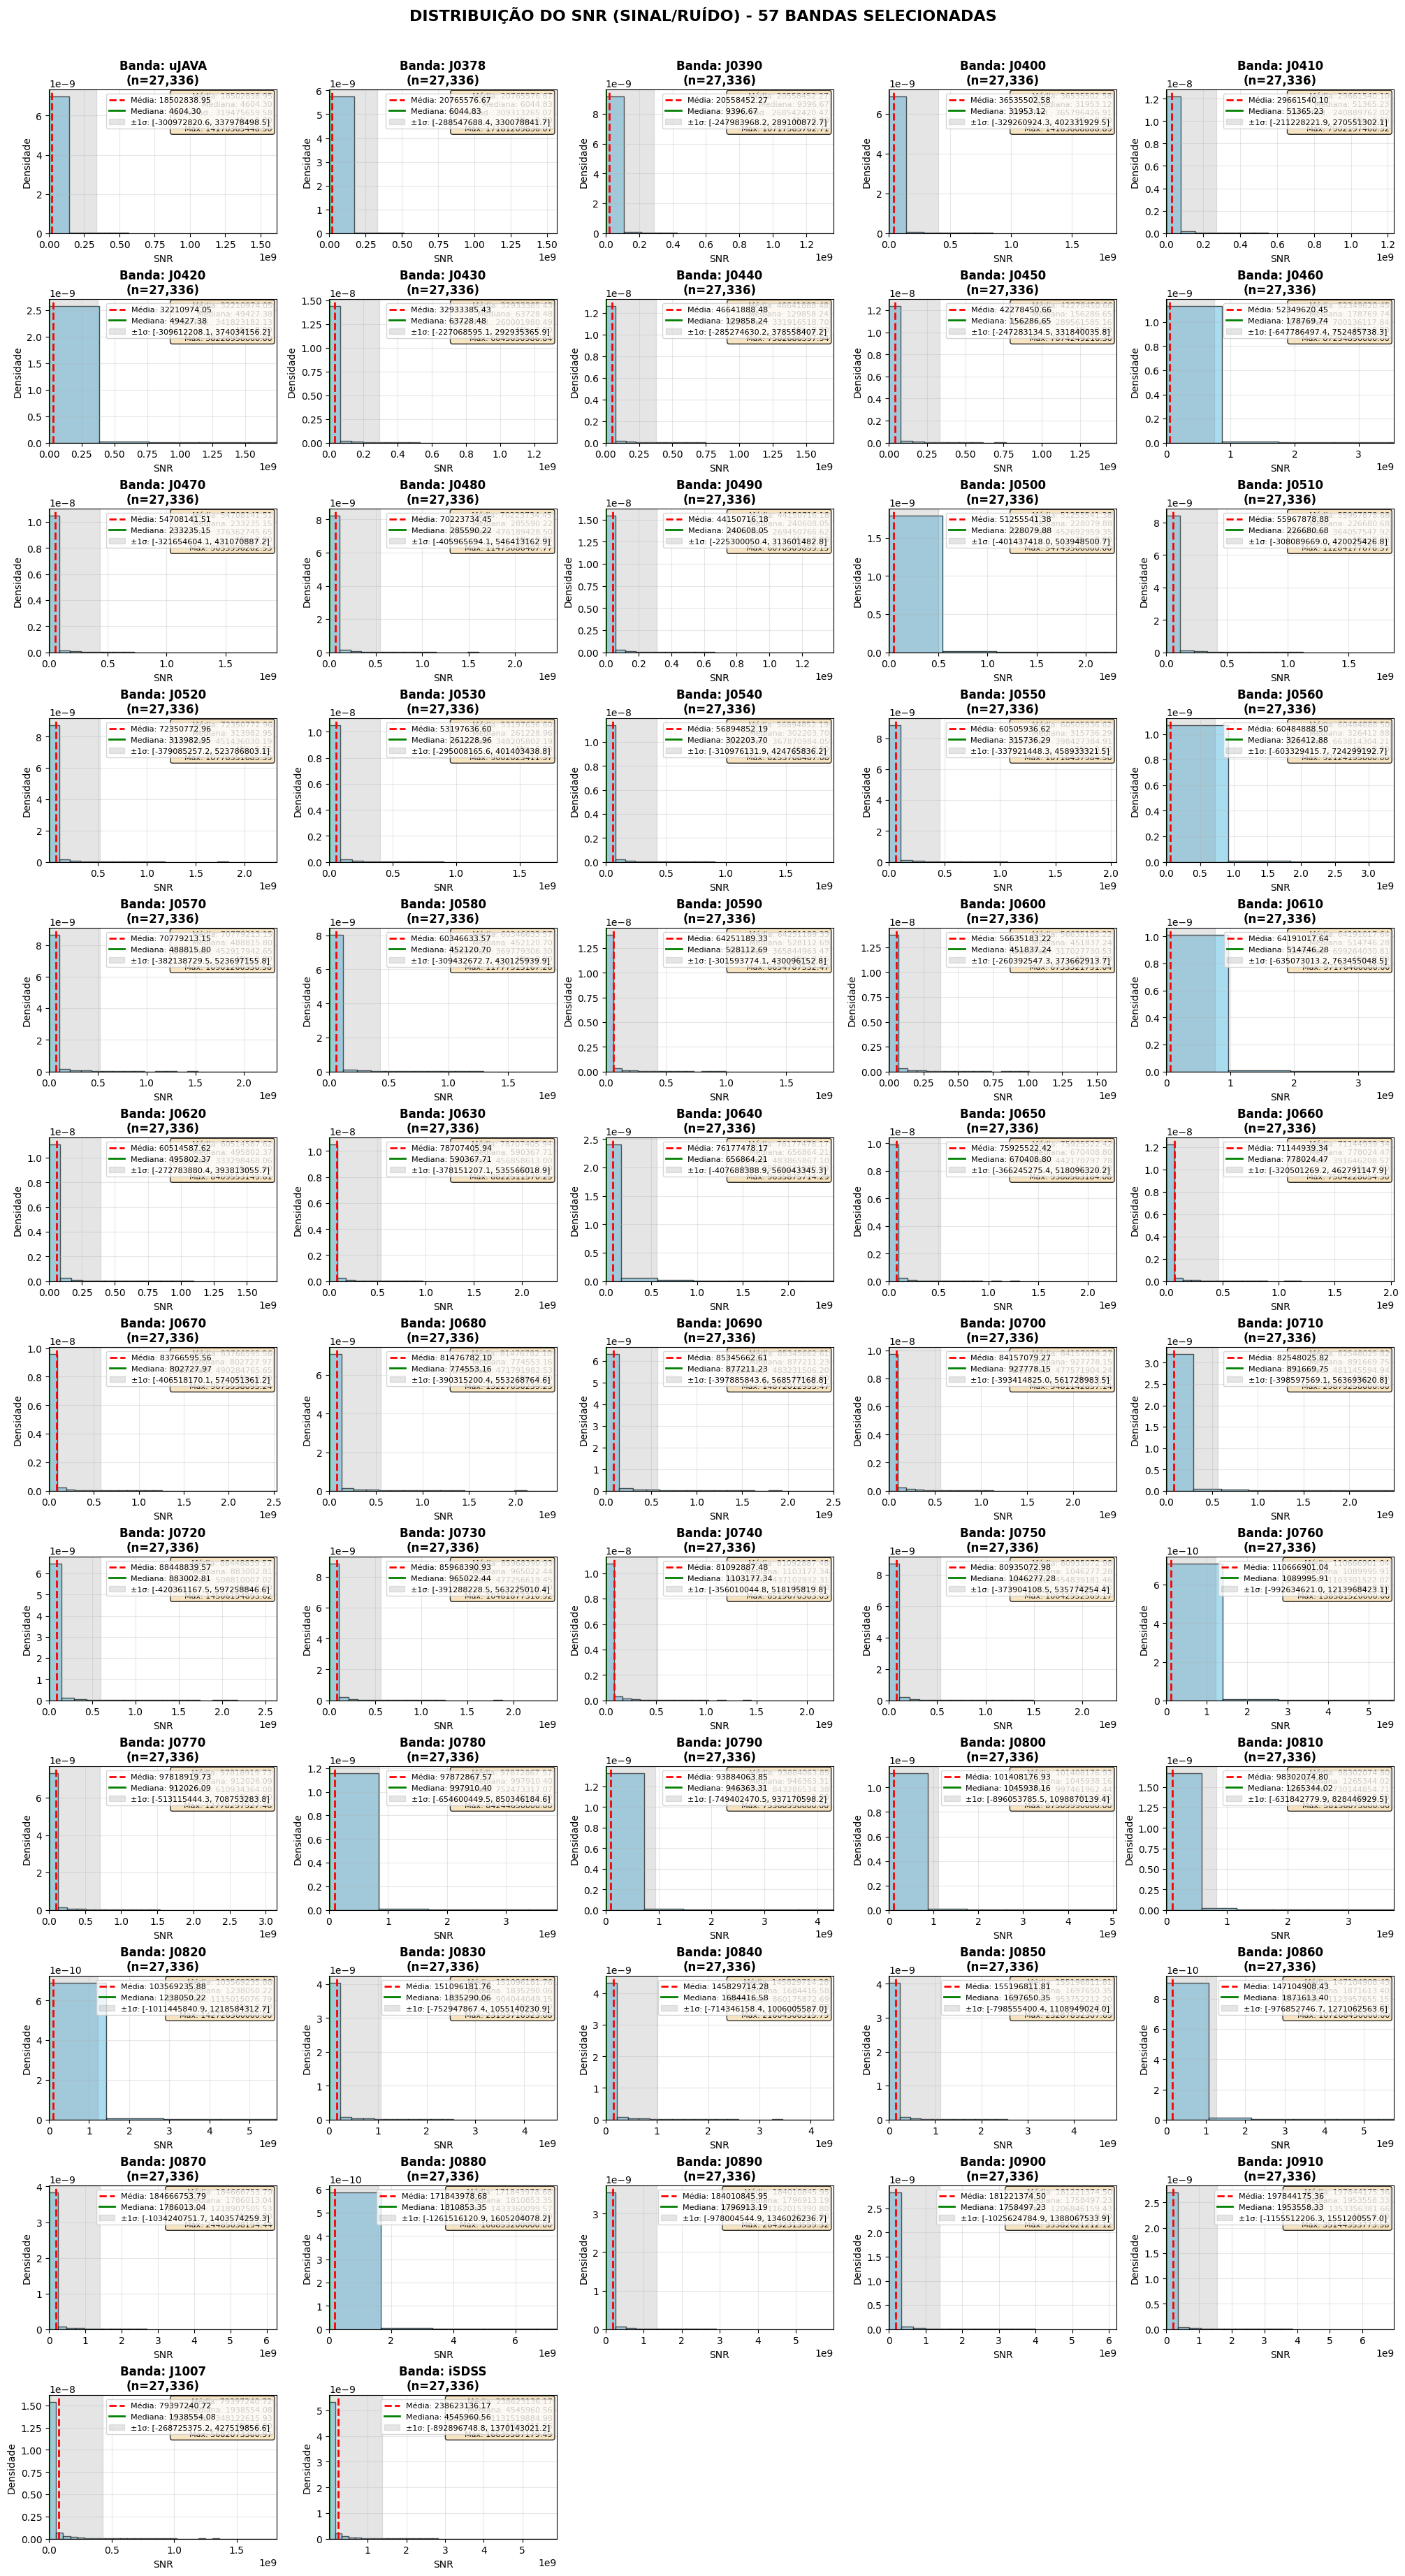


 RELATÓRIO DETALHADO DE ESTATÍSTICAS DO SNR

──────────────────────────────────────────────────
 BANDA: uJAVA
──────────────────────────────────────────────────
  Mínimo              :     0.0000
  Máximo              : 14170365448.5050
  Média               : 18502838.9523
  Mediana             :  4604.3020
  Desvio Padrão       : 319475659.5778
  Variância           : 102064697062658368.0000
  Q1 (25%)            :    91.3930
  Q3 (75%)            : 232973.1419
  IQR                 : 232881.7489
  Assimetria (Skewness):    31.3207
  Curtose (Kurtosis)  :  1108.2750
  Contagem total      :      27336
  Valores ausentes    :          0

   DISTRIBUIÇÃO POR FAIXAS DE SNR:
    0-5       :   1889 estrelas (  6.91%)
    5-10      :    779 estrelas (  2.85%)
    10-20     :   1036 estrelas (  3.79%)
    20-50     :   1772 estrelas (  6.48%)
    50-100    :   1552 estrelas (  5.68%)
    100-200   :   1563 estrelas (  5.72%)
    200-500   :   1750 estrelas (  6.40%)
    >500      :  16995 e

In [ ]:
print("\n" + "=" * 80)
print("4.4 HISTOGRAMA DO SINAL/RUÍDO (SNR) DE CADA BANDA")
print("=" * 80)

import threading
import time

def get_user_input_with_timeout(prompt, timeout_seconds=300, default_selection=None):
    """
    Função para obter entrada do usuário com timeout.
    Se o usuário não responder dentro do tempo limite, retorna a seleção padrão.
    """
    result = {"user_input": None}

    def input_thread():
        try:
            result["user_input"] = input(prompt)
        except Exception as e:
            print(f"Erro ao obter entrada: {e}")

    thread = threading.Thread(target=input_thread)
    thread.daemon = True
    thread.start()

    thread.join(timeout_seconds)

    if thread.is_alive():
        print(f"\n Tempo limite de {timeout_seconds//60} minutos excedido.")
        print("Selecionando bandas aleatoriamente...")
        return default_selection
    else:
        return result["user_input"]

# Listar todas as bandas disponíveis no DataFrame de SNR
snr_columns = [col for col in df_snr_flux.columns if col.startswith('SNR_')]
band_names_snr = [col.replace('SNR_', '') for col in snr_columns]

print(f"\n Número total de bandas com SNR calculado: {len(band_names_snr)}")
print(f" Lista completa de bandas disponíveis:\n")

# Exibir bandas em formato organizado
for i, band in enumerate(band_names_snr, 1):
    print(f"{i:3d}. {band:10s}", end="")
    if i % 5 == 0:
        print()

print(f"\n\n{'='*50}")
print(" SELEÇÃO INTERATIVA DE BANDAS PARA ANÁLISE")
print("="*50)

# Preparar seleção padrão (caso timeout)
default_indices = list(range(min(3, len(band_names_snr))))
default_bands = [band_names_snr[i] for i in default_indices]

prompt_msg = f"""\n Você pode selecionar bandas específicas para análise.

  Formato de entrada:
   - Para bandas individuais: "1,5,12"
   - Para um intervalo: "3-7"
   - Para todas as bandas: "all"
   - Para bandas específicas pelo nome: "J0810,J0430,J0750"

  Digite sua seleção (ou pressione Enter para 3 bandas aleatórias): """

# Obter entrada do usuário com timeout
user_selection = get_user_input_with_timeout(prompt_msg, timeout_seconds=300, default_selection="random")

# Processar a seleção do usuário
selected_bands = []

if user_selection is None or user_selection.strip() == "" or user_selection.lower() == "random":
    # Seleção aleatória (padrão)
    import random
    selected_indices = random.sample(range(len(band_names_snr)), min(3, len(band_names_snr)))
    selected_bands = [band_names_snr[i] for i in selected_indices]
    print(f"\n Selecionadas 3 bandas aleatoriamente: {', '.join(selected_bands)}")

elif user_selection.lower() == "all":
    # Selecionar todas as bandas
    selected_bands = band_names_snr.copy()
    print(f"\n Selecionadas TODAS as {len(selected_bands)} bandas")

elif any(band_name in user_selection.upper() for band_name in band_names_snr):
    # O usuário digitou nomes de bandas
    input_bands = [band.strip().upper() for band in user_selection.split(',')]
    for band in input_bands:
        if band in band_names_snr:
            selected_bands.append(band)
        else:
            print(f"  Banda '{band}' não encontrada. Pulando...")

    if not selected_bands:
        print(" Nenhuma banda válida encontrada. Usando seleção aleatória.")
        import random
        selected_indices = random.sample(range(len(band_names_snr)), min(3, len(band_names_snr)))
        selected_bands = [band_names_snr[i] for i in selected_indices]

    print(f"\n Selecionadas {len(selected_bands)} bandas: {', '.join(selected_bands)}")

else:
    # O usuário digitou números ou intervalos
    try:
        selected_indices = []
        parts = user_selection.replace(' ', '').split(',')

        for part in parts:
            if '-' in part:
                # É um intervalo
                start, end = map(int, part.split('-'))
                selected_indices.extend(range(start-1, end))
            else:
                # É um número individual
                selected_indices.append(int(part) - 1)

        # Filtrar índices válidos
        valid_indices = [idx for idx in selected_indices if 0 <= idx < len(band_names_snr)]

        if valid_indices:
            selected_bands = [band_names_snr[idx] for idx in valid_indices]
            print(f"\n Selecionadas {len(selected_bands)} bandas: {', '.join(selected_bands)}")
        else:
            print(" Nenhum índice válido. Usando seleção aleatória.")
            import random
            selected_indices = random.sample(range(len(band_names_snr)), min(3, len(band_names_snr)))
            selected_bands = [band_names_snr[i] for i in selected_indices]

    except ValueError:
        print(" Formato inválido. Usando seleção aleatória.")
        import random
        selected_indices = random.sample(range(len(band_names_snr)), min(3, len(band_names_snr)))
        selected_bands = [band_names_snr[i] for i in selected_indices]

# Plotar histogramas para as bandas selecionadas
print(f"\n{'='*50}")
print(" GERANDO HISTOGRAMAS DAS BANDAS SELECIONADAS")
print("="*50)

import matplotlib.pyplot as plt
import numpy as np

# Configurar layout dos subplots
n_bands = len(selected_bands)
if n_bands <= 3:
    n_cols = n_bands
    n_rows = 1
    fig_size = (5*n_bands, 4)
elif n_bands <= 6:
    n_cols = 3
    n_rows = 2
    fig_size = (15, 8)
elif n_bands <= 12:
    n_cols = 4
    n_rows = 3
    fig_size = (16, 12)
else:
    n_cols = 5
    n_rows = (n_bands + 4) // 5
    fig_size = (20, 3*n_rows)

fig, axes = plt.subplots(n_rows, n_cols, figsize=fig_size, constrained_layout=True)

# Ajustar para o caso de apenas uma banda
if n_bands == 1:
    axes = np.array([axes])
if n_rows == 1 and n_cols == 1:
    axes = np.array([axes])

# Achatar o array de axes para facilitar a iteração
axes_flat = axes.flatten()

# Plotar histograma para cada banda selecionada
for idx, band in enumerate(selected_bands):
    ax = axes_flat[idx]
    snr_col = f'SNR_{band}'

    if snr_col in df_snr_flux.columns:
        snr_values = df_snr_flux[snr_col].dropna()

        if len(snr_values) > 0:
            # Calcular estatísticas
            mean_val = snr_values.mean()
            median_val = snr_values.median()
            std_val = snr_values.std()

            # Determinar número ótimo de bins (regra de Freedman-Diaconis)
            iqr = snr_values.quantile(0.75) - snr_values.quantile(0.25)
            bin_width = 2 * iqr / (len(snr_values) ** (1/3))
            n_bins = int((snr_values.max() - snr_values.min()) / bin_width) if bin_width > 0 else 30
            n_bins = min(max(n_bins, 10), 100)  # Limitar entre 10 e 100 bins

            # Plotar histograma
            n, bins, patches = ax.hist(snr_values, bins=n_bins, alpha=0.7, color='skyblue',
                                      edgecolor='black', density=True)

            # Adicionar linhas de média e mediana
            ax.axvline(mean_val, color='red', linestyle='--', linewidth=2,
                      label=f'Média: {mean_val:.2f}')
            ax.axvline(median_val, color='green', linestyle='-', linewidth=2,
                      label=f'Mediana: {median_val:.2f}')

            # Adicionar área de ±1 desvio padrão
            ax.axvspan(mean_val - std_val, mean_val + std_val, alpha=0.2, color='gray',
                      label=f'±1σ: [{mean_val-std_val:.1f}, {mean_val+std_val:.1f}]')

            # Configurações do gráfico
            ax.set_title(f'Banda: {band}\n(n={len(snr_values):,})', fontsize=12, fontweight='bold')
            ax.set_xlabel('SNR', fontsize=10)
            ax.set_ylabel('Densidade', fontsize=10)
            ax.grid(True, alpha=0.3)
            ax.legend(loc='upper right', fontsize=8)

            # Ajustar limites do eixo x para melhor visualização
            x_min = max(snr_values.min() * 0.9, 0)
            x_max = min(snr_values.max() * 1.1, mean_val + 5*std_val)
            ax.set_xlim(x_min, x_max)

            # Adicionar texto com estatísticas
            stats_text = (f'Média: {mean_val:.2f}\n'
                         f'Mediana: {median_val:.2f}\n'
                         f'Desv.Pad.: {std_val:.2f}\n'
                         f'Mín: {snr_values.min():.2f}\n'
                         f'Máx: {snr_values.max():.2f}')

            ax.text(0.98, 0.98, stats_text, transform=ax.transAxes,
                   fontsize=8, verticalalignment='top', horizontalalignment='right',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

        else:
            ax.text(0.5, 0.5, f'Sem dados\npara {band}',
                   horizontalalignment='center', verticalalignment='center',
                   transform=ax.transAxes, fontsize=12)
            ax.set_title(f'Banda: {band}', fontsize=12)
    else:
        ax.text(0.5, 0.5, f'SNR não\ncalculado\npara {band}',
               horizontalalignment='center', verticalalignment='center',
               transform=ax.transAxes, fontsize=12)
        ax.set_title(f'Banda: {band}', fontsize=12)

    # Remover eixos dos subplots não utilizados
    for empty_idx in range(len(selected_bands), len(axes_flat)):
        axes_flat[empty_idx].set_visible(False)

# Título principal
plt.suptitle(f'DISTRIBUIÇÃO DO SNR (SINAL/RUÍDO) - {len(selected_bands)} BANDAS SELECIONADAS',
             fontsize=16, fontweight='bold', y=1.02)

plt.show()

# RELATÓRIO DETALHADO DAS ESTATÍSTICAS
print(f"\n{'='*80}")
print(" RELATÓRIO DETALHADO DE ESTATÍSTICAS DO SNR")
print("="*80)

for band in selected_bands:
    snr_col = f'SNR_{band}'

    if snr_col in df_snr_flux.columns:
        snr_values = df_snr_flux[snr_col].dropna()

        if len(snr_values) > 0:
            print(f"\n{'─'*50}")
            print(f" BANDA: {band}")
            print(f"{'─'*50}")

            # Estatísticas descritivas básicas
            stats = {
                'Mínimo': snr_values.min(),
                'Máximo': snr_values.max(),
                'Média': snr_values.mean(),
                'Mediana': snr_values.median(),
                'Desvio Padrão': snr_values.std(),
                'Variância': snr_values.var(),
                'Q1 (25%)': snr_values.quantile(0.25),
                'Q3 (75%)': snr_values.quantile(0.75),
                'IQR': snr_values.quantile(0.75) - snr_values.quantile(0.25),
                'Assimetria (Skewness)': snr_values.skew(),
                'Curtose (Kurtosis)': snr_values.kurtosis(),
                'Contagem total': len(snr_values),
                'Valores ausentes': df_snr_flux[snr_col].isna().sum()
            }

            for stat_name, stat_value in stats.items():
                if isinstance(stat_value, float):
                    print(f"  {stat_name:<20}: {stat_value:>10.4f}")
                else:
                    print(f"  {stat_name:<20}: {stat_value:>10}")

            # Análise de faixas de SNR
            print(f"\n   DISTRIBUIÇÃO POR FAIXAS DE SNR:")
            bins_custom = [0, 5, 10, 20, 50, 100, 200, 500, float('inf')]
            labels = ['0-5', '5-10', '10-20', '20-50', '50-100', '100-200', '200-500', '>500']

            if snr_values.max() > 0:
                hist, bin_edges = np.histogram(snr_values, bins=bins_custom)
                total = hist.sum()

                for i, (count, label) in enumerate(zip(hist, labels)):
                    if count > 0:
                        percentage = (count / total) * 100
                        print(f"    {label:<10}: {count:>6} estrelas ({percentage:>6.2f}%)")

            # Identificar outliers usando IQR
            Q1 = snr_values.quantile(0.25)
            Q3 = snr_values.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = snr_values[(snr_values < lower_bound) | (snr_values > upper_bound)]
            n_outliers = len(outliers)

            if n_outliers > 0:
                print(f"     OUTLIERS (método IQR): {n_outliers} valores")
                print(f"     Limite inferior: {lower_bound:.2f}")
                print(f"     Limite superior: {upper_bound:.2f}")
                print(f"     Outliers extremos: {len(outliers[outliers > upper_bound*2])} valores > {upper_bound*2:.2f}")
        else:
            print(f"\n BANDA {band}: Nenhum dado disponível para análise")
    else:
        print(f"\n BANDA {band}: Coluna SNR não encontrada")

# Estatísticas comparativas entre as bandas selecionadas
print(f"\n{'='*80}")
print(" ESTATÍSTICAS COMPARATIVAS ENTRE AS BANDAS")
print("="*80)

comparison_data = []
for band in selected_bands:
    snr_col = f'SNR_{band}'
    if snr_col in df_snr_flux.columns:
        snr_vals = df_snr_flux[snr_col].dropna()
        if len(snr_vals) > 0:
            comparison_data.append({
                'Banda': band,
                'Média': snr_vals.mean(),
                'Mediana': snr_vals.median(),
                'Desvio Padrão': snr_vals.std(),
                'SNR Mínimo': snr_vals.min(),
                'SNR Máximo': snr_vals.max(),
                'N Amostras': len(snr_vals)
            })

if comparison_data:
    comparison_df = pd.DataFrame(comparison_data)

    # Ordenar por SNR médio (decrescente)
    comparison_df = comparison_df.sort_values('Média', ascending=False)

    print("\nClassificação por SNR médio (maior para menor):")
    print(comparison_df.to_string(index=False))

    # Salvar relatório comparativo
    comparison_df.to_csv('/content/drive/MyDrive/Notebook fotometrias/snr_comparison_report.csv', index=False)
    print(f"\n Relatório comparativo salvo como 'snr_comparison_report.csv'")

    # Análise adicional
    print(f"\n RESUMO COMPARATIVO:")
    print(f"   Banda com maior SNR médio: {comparison_df.iloc[0]['Banda']} ({comparison_df.iloc[0]['Média']:.2f})")
    print(f"   Banda com menor SNR médio: {comparison_df.iloc[-1]['Banda']} ({comparison_df.iloc[-1]['Média']:.2f})")
    print(f"   Maior variação (desvio padrão): {comparison_df.loc[comparison_df['Desvio Padrão'].idxmax()]['Banda']}")
    print(f"   Menor variação: {comparison_df.loc[comparison_df['Desvio Padrão'].idxmin()]['Banda']}")

print(f"\n{'='*80}")
print(" ANÁLISE DO SNR CONCLUÍDA COM SUCESSO!")
print("="*80)

#### **VISUALIZAÇÃO COM ESCALA ADAPTATIVA**

In [ ]:
print("\n" + "=" * 80)
print("VISUALIZAÇÃO COM ESCALA ADAPTATIVA - ANÁLISE COMPARATIVA DO SNR")
print("=" * 80)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo dos gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Preparar dados para visualização
snr_columns = [col for col in df_snr_flux.columns if col.startswith('SNR_')]
band_names = [col.replace('SNR_', '') for col in snr_columns]

# Coletar dados de SNR de todas as bandas
all_snr_data = []
for band in band_names:
    snr_col = f'SNR_{band}'
    if snr_col in df_snr_flux.columns:
        values = df_snr_flux[snr_col].dropna().values
        if len(values) > 0:
            all_snr_data.extend(values)

print(f"\n Dados preparados para visualização:")
print(f"   • Total de bandas: {len(band_names)}")
print(f"   • Amostras de SNR: {len(all_snr_data):,}")
print(f"   • Faixa de SNR: [{min(all_snr_data):.2f}, {max(all_snr_data):.2f}]")


VISUALIZAÇÃO COM ESCALA ADAPTATIVA - ANÁLISE COMPARATIVA DO SNR

 Dados preparados para visualização:
   • Total de bandas: 57
   • Amostras de SNR: 1,558,152
   • Faixa de SNR: [-29796221000.00, 166853200000.00]



VISUALIZAÇÃO 1: VISÃO GERAL COM SUBPLOTS ADAPTATIVOS


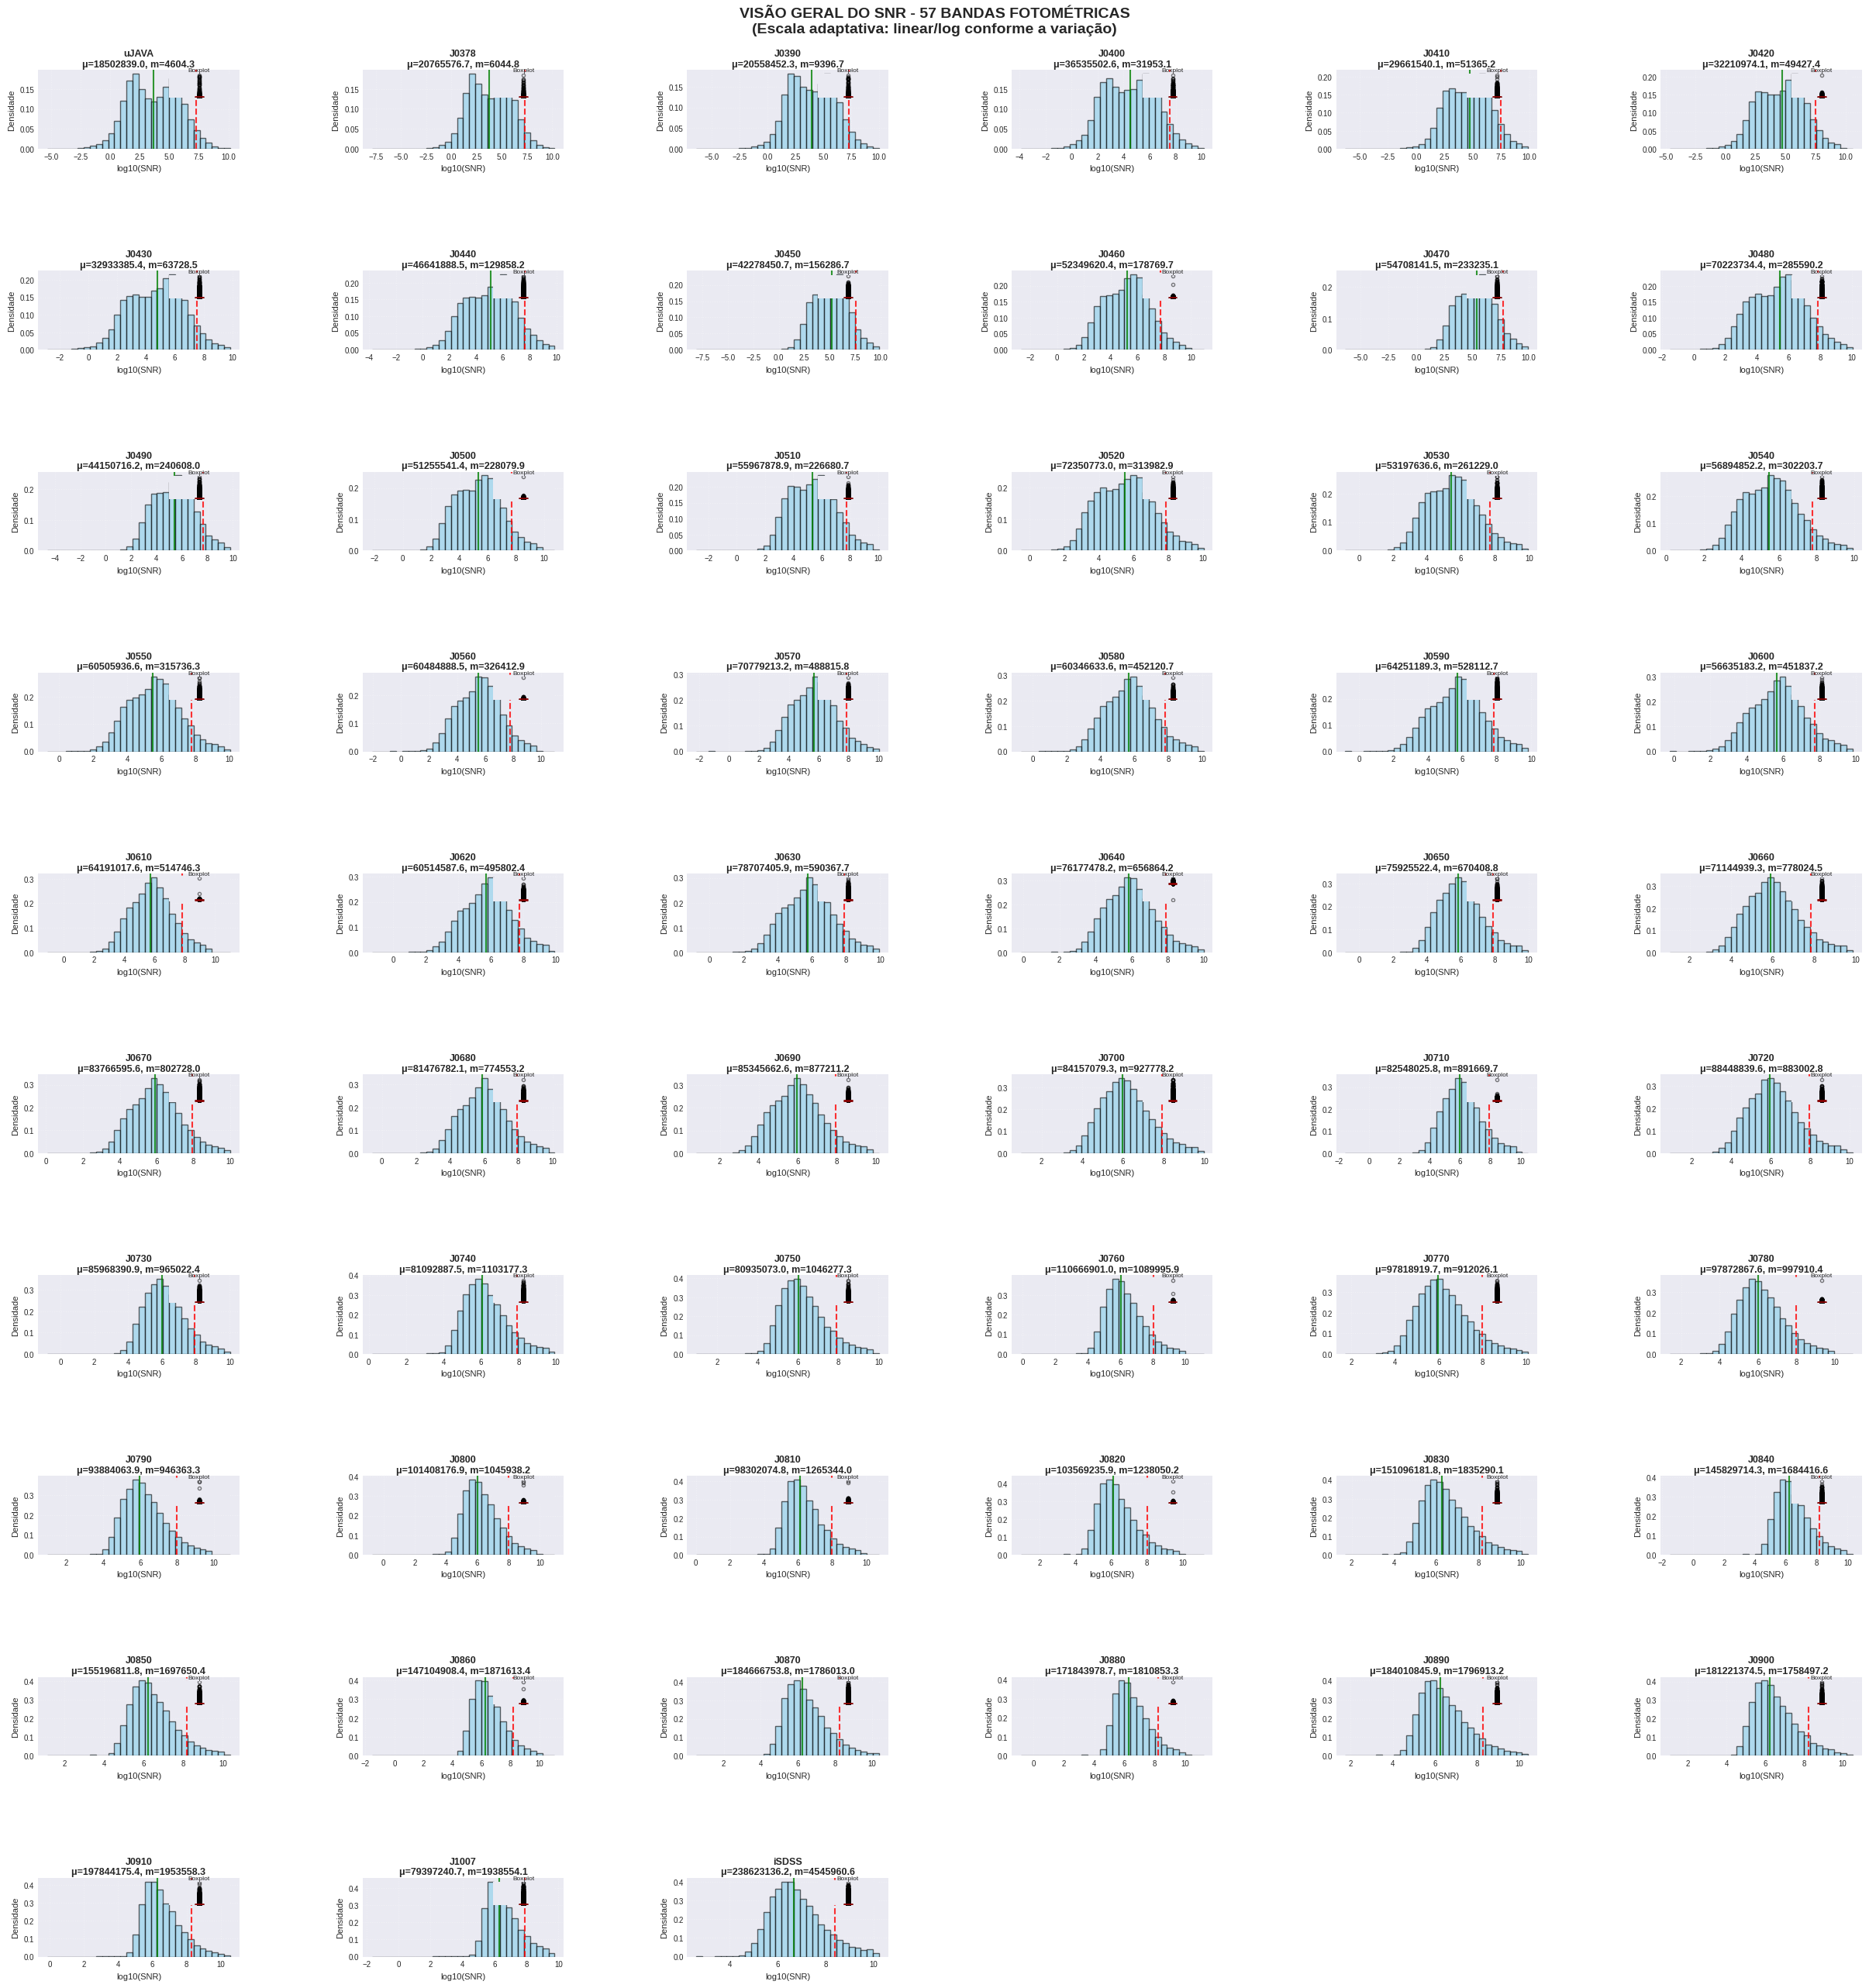

In [ ]:
# ============================================================================
# VISUALIZAÇÃO 1: SUBPLOTS MULTIDIMENSIONAIS COM ESCALA ADAPTATIVA
# ============================================================================

print(f"\n{'='*50}")
print("VISUALIZAÇÃO 1: VISÃO GERAL COM SUBPLOTS ADAPTATIVOS")
print("="*50)

# Determinar layout baseado no número de bandas
n_bands = len(band_names)

if n_bands <= 10:
    n_cols = 2
    n_rows = 5
    fig_size = (16, 20)
elif n_bands <= 20:
    n_cols = 4
    n_rows = 5
    fig_size = (20, 15)
elif n_bands <= 30:
    n_cols = 5
    n_rows = 6
    fig_size = (22, 18)
else:
    n_cols = 6
    n_rows = 10
    fig_size = (24, 25)

# Criar figura com GridSpec para maior flexibilidade
fig = plt.figure(figsize=fig_size, constrained_layout=True)
gs = GridSpec(n_rows, n_cols, figure=fig, hspace=0.4, wspace=0.3)

# Plotar histograma e boxplot para cada banda
for idx, band in enumerate(band_names[:n_rows*n_cols]):  # Limitar ao número de subplots
    snr_col = f'SNR_{band}'

    if snr_col in df_snr_flux.columns:
        row = idx // n_cols
        col = idx % n_cols

        # Criar subplot principal (histograma)
        ax1 = fig.add_subplot(gs[row, col])

        snr_values = df_snr_flux[snr_col].dropna()

        if len(snr_values) > 0:
            # HISTOGRAMA (esquerda)
            mean_val = snr_values.mean()
            median_val = snr_values.median()
            std_val = snr_values.std()

            # Escala adaptativa para o histograma
            # Handle non-positive minimum to avoid ZeroDivisionError and log(<=0)
            if snr_values.min() <= 0:
                # If min is non-positive, use log scale for positive values
                log_values = np.log10(snr_values[snr_values > 0])
                if len(log_values) > 0: # Only plot if there are positive values
                    ax1.hist(log_values, bins=30, alpha=0.6, color='skyblue',
                            edgecolor='black', density=True)
                    ax1.set_xlabel('log10(SNR)', fontsize=8)

                    # Ensure mean_val and median_val are positive before taking log
                    mean_log = np.log10(mean_val) if mean_val > 0 else np.nan
                    median_log = np.log10(median_val) if median_val > 0 else np.nan

                    if not np.isnan(mean_log):
                        ax1.axvline(mean_log, color='red', linestyle='--', linewidth=1.5, alpha=0.8)
                    if not np.isnan(median_log):
                        ax1.axvline(median_log, color='green', linestyle='-', linewidth=1.5, alpha=0.8)
                else: # No positive values to plot in log scale
                    ax1.text(0.5, 0.5, 'No positive SNR data\nfor log scale',
                            horizontalalignment='center', verticalalignment='center',
                            transform=ax1.transAxes, fontsize=10)
            elif snr_values.max() / snr_values.min() > 100:  # Original check for large variation
                # If min is positive and ratio is large, use log scale
                log_values = np.log10(snr_values) # All values are positive here
                ax1.hist(log_values, bins=30, alpha=0.6, color='skyblue',
                        edgecolor='black', density=True)
                ax1.set_xlabel('log10(SNR)', fontsize=8)
                ax1.axvline(np.log10(mean_val), color='red', linestyle='--', linewidth=1.5, alpha=0.8)
                ax1.axvline(np.log10(median_val), color='green', linestyle='-', linewidth=1.5, alpha=0.8)
            else:
                # Usar escala linear
                ax1.hist(snr_values, bins=30, alpha=0.6, color='skyblue',
                        edgecolor='black', density=True)
                ax1.set_xlabel('SNR', fontsize=8)
                ax1.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, alpha=0.8)
                ax1.axvline(median_val, color='green', linestyle='-', linewidth=1.5, alpha=0.8)

            ax1.set_title(f'{band}\nμ={mean_val:.1f}, m={median_val:.1f}',
                         fontsize=9, fontweight='bold', pad=3)
            ax1.set_ylabel('Densidade', fontsize=8)
            ax1.grid(True, alpha=0.3, linestyle=':')
            ax1.tick_params(labelsize=7)

            # Adicionar pequeno boxplot dentro do histograma (inset)
            ax2 = ax1.inset_axes([0.65, 0.65, 0.3, 0.3])
            boxplot_props = {
                'boxprops': dict(facecolor='lightcoral', alpha=0.7),
                'medianprops': dict(color='darkred', linewidth=2),
                'whiskerprops': dict(color='gray', linestyle='--'),
                'capprops': dict(color='gray'),
                'flierprops': dict(marker='o', markersize=3, alpha=0.5)
            }
            ax2.boxplot(snr_values, vert=True, patch_artist=True, **boxplot_props)
            ax2.set_xticks([])
            ax2.set_yticks([])
            ax2.set_title('Boxplot', fontsize=6, pad=2)
            ax2.grid(True, alpha=0.2)

        else:
            ax1.text(0.5, 0.5, 'Sem dados',
                    horizontalalignment='center', verticalalignment='center',
                    transform=ax1.transAxes, fontsize=10)
            ax1.set_title(band, fontsize=9)

    # Se não couberem todas as bandas, mostrar mensagem
    if idx == n_rows * n_cols - 1 and n_bands > n_rows * n_cols:
        remaining = n_bands - (n_rows * n_cols)
        ax_last = fig.add_subplot(gs[n_rows-1, n_cols-1])
        ax_last.text(0.5, 0.5, f'+{remaining}\nbandas\nnão mostradas',
                    horizontalalignment='center', verticalalignment='center',
                    transform=ax_last.transAxes, fontsize=10, fontweight='bold')
        ax_last.set_xticks([])
        ax_last.set_yticks([])
        ax_last.spines['top'].set_visible(False)
        ax_last.spines['right'].set_visible(False)
        ax_last.spines['bottom'].set_visible(False)
        ax_last.spines['left'].set_visible(False)

plt.suptitle(f'VISÃO GERAL DO SNR - {n_bands} BANDAS FOTOMÉTRICAS\n' +
            f'(Escala adaptativa: linear/log conforme a variação)',
            fontsize=14, fontweight='bold', y=1.02)
plt.show()


VISUALIZAÇÃO 2: HEATMAP DE CORRELAÇÃO ENTRE BANDAS


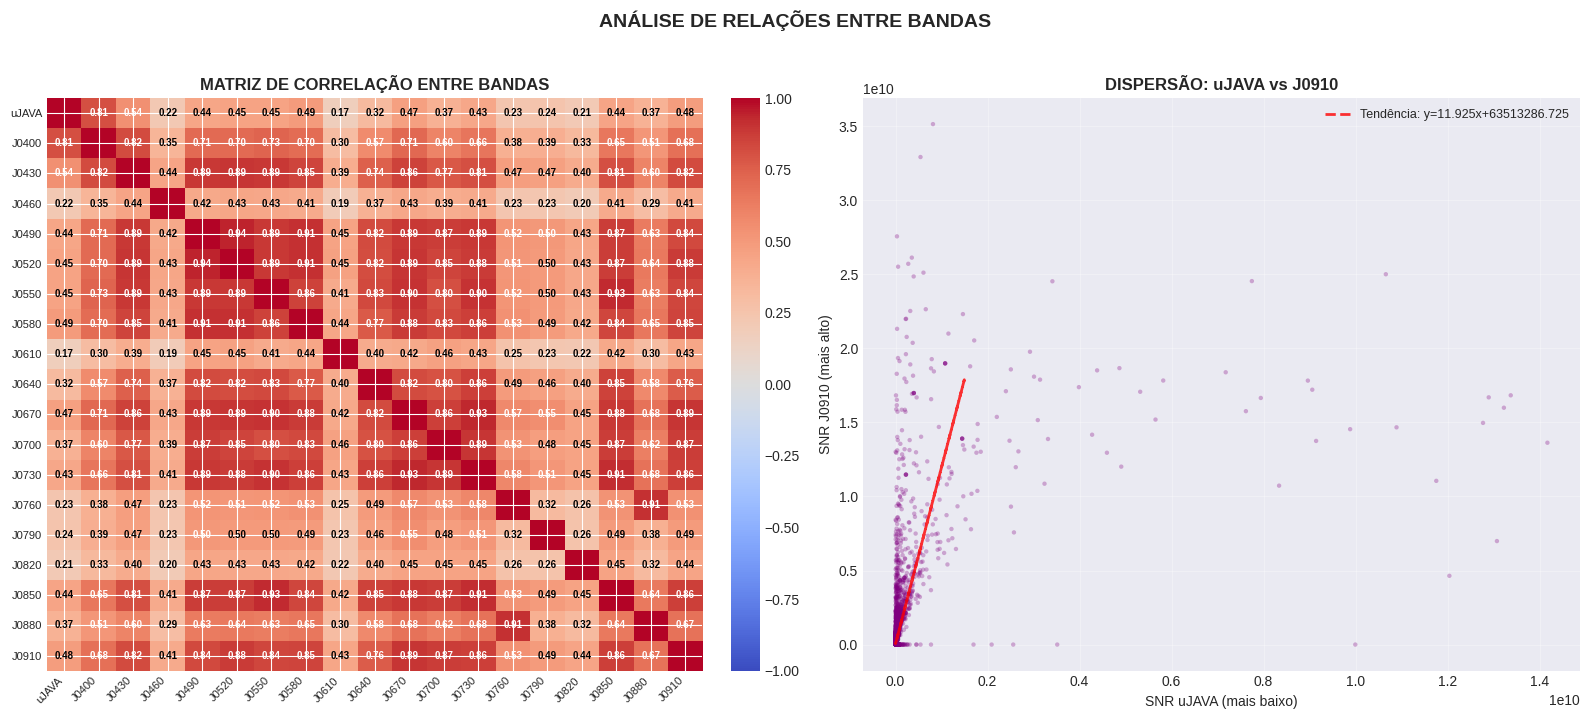

In [ ]:
# ============================================================================
# VISUALIZAÇÃO 2: HEATMAP DE CORRELAÇÃO ENTRE BANDAS (amostra)
# ============================================================================

print(f"\n{'='*50}")
print("VISUALIZAÇÃO 2: HEATMAP DE CORRELAÇÃO ENTRE BANDAS")
print("="*50)

# Selecionar um subconjunto de bandas para o heatmap (para não sobrecarregar)
if len(band_names) > 20:
    # Selecionar bandas estrategicamente: primeiras, do meio e últimas
    sample_indices = list(range(0, len(band_names), max(1, len(band_names)//15)))
    sample_bands = [band_names[i] for i in sample_indices if i < len(band_names)]
    sample_bands = sample_bands[:20]  # Limitar a 20 bandas
else:
    sample_bands = band_names

# Criar DataFrame com amostra de bandas
sample_data = pd.DataFrame()
for band in sample_bands:
    snr_col = f'SNR_{band}'
    if snr_col in df_snr_flux.columns:
        sample_data[band] = df_snr_flux[snr_col]

if len(sample_bands) >= 3:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

    # HEATMAP de correlação
    correlation_matrix = sample_data.corr()

    # Mascarar a diagonal
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    im = ax1.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')
    ax1.set_title('MATRIZ DE CORRELAÇÃO ENTRE BANDAS', fontsize=12, fontweight='bold')
    ax1.set_xticks(range(len(sample_bands)))
    ax1.set_yticks(range(len(sample_bands)))
    ax1.set_xticklabels(sample_bands, rotation=45, ha='right', fontsize=8)
    ax1.set_yticklabels(sample_bands, fontsize=8)

    # Adicionar valores numéricos
    for i in range(len(sample_bands)):
        for j in range(len(sample_bands)):
            if i != j:  # Não mostrar diagonal
                value = correlation_matrix.iloc[i, j]
                color = 'white' if abs(value) > 0.5 else 'black'
                ax1.text(j, i, f'{value:.2f}', ha='center', va='center',
                        color=color, fontsize=7, fontweight='bold')

    plt.colorbar(im, ax=ax1, fraction=0.046, pad=0.04)

    # GRÁFICO DE DISPERSÃO 2D (duas bandas representativas)
    # Encontrar bandas com maior e menor SNR médio
    mean_snr_by_band = {}
    for band in sample_bands:
        snr_col = f'SNR_{band}'
        if snr_col in df_snr_flux.columns:
            mean_snr_by_band[band] = df_snr_flux[snr_col].mean()

    if len(mean_snr_by_band) >= 2:
        sorted_bands = sorted(mean_snr_by_band.items(), key=lambda x: x[1])
        band_low = sorted_bands[0][0]
        band_high = sorted_bands[-1][0]

        ax2.scatter(df_snr_flux[f'SNR_{band_low}'],
                   df_snr_flux[f'SNR_{band_high}'],
                   alpha=0.3, s=10, c='purple', edgecolors='none')

        ax2.set_xlabel(f'SNR {band_low} (mais baixo)', fontsize=10)
        ax2.set_ylabel(f'SNR {band_high} (mais alto)', fontsize=10)
        ax2.set_title(f'DISPERSÃO: {band_low} vs {band_high}',
                     fontsize=12, fontweight='bold')
        ax2.grid(True, alpha=0.3)

        # Adicionar linha de tendência
        x = df_snr_flux[f'SNR_{band_low}'].dropna().values[:1000]  # Amostra
        y = df_snr_flux[f'SNR_{band_high}'].dropna().values[:1000]

        if len(x) > 10 and len(y) > 10:
            z = np.polyfit(x, y, 1)
            p = np.poly1d(z)
            ax2.plot(x, p(x), "r--", alpha=0.8, linewidth=2,
                    label=f'Tendência: y={z[0]:.3f}x+{z[1]:.3f}')
            ax2.legend(fontsize=9)

    plt.suptitle('ANÁLISE DE RELAÇÕES ENTRE BANDAS', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()


VISUALIZAÇÃO 3: DASHBOARD COMPARATIVO MULTIDIMENSIONAL


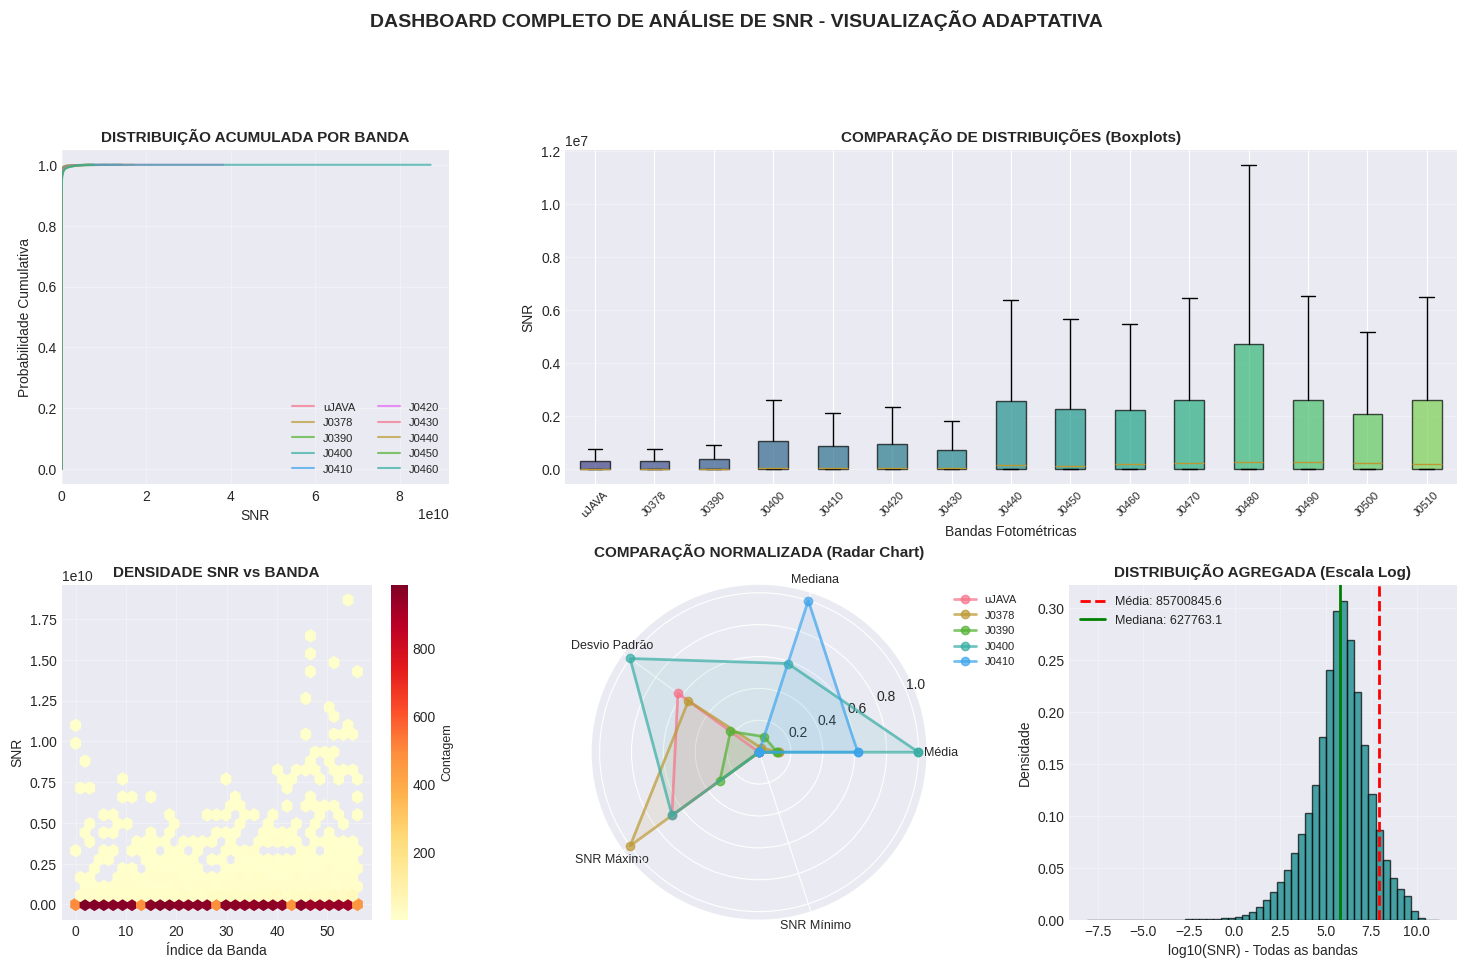

In [ ]:
# ============================================================================
# VISUALIZAÇÃO 3: DASHBOARD INTERATIVO COM MÚLTIPLAS PERSPECTIVAS
# ============================================================================

print(f"\n{'='*50}")
print("VISUALIZAÇÃO 3: DASHBOARD COMPARATIVO MULTIDIMENSIONAL")
print("="*50)

fig = plt.figure(figsize=(18, 10))
gs_dashboard = GridSpec(2, 3, figure=fig, hspace=0.3, wspace=0.3)

# Subplot 1: Distribuição cumulativa de SNR por banda
ax1 = fig.add_subplot(gs_dashboard[0, 0])
for i, band in enumerate(band_names[:10]):  # Mostrar apenas 10 bandas para clareza
    snr_col = f'SNR_{band}'
    if snr_col in df_snr_flux.columns:
        snr_values = df_snr_flux[snr_col].dropna()
        if len(snr_values) > 0:
            sorted_values = np.sort(snr_values)
            cum_probs = np.arange(1, len(sorted_values) + 1) / len(sorted_values)
            ax1.plot(sorted_values, cum_probs, linewidth=1.5, alpha=0.7, label=band)

ax1.set_xlabel('SNR', fontsize=10)
ax1.set_ylabel('Probabilidade Cumulativa', fontsize=10)
ax1.set_title('DISTRIBUIÇÃO ACUMULADA POR BANDA', fontsize=11, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=8, ncol=2, loc='lower right')
ax1.set_xlim(left=0)

# Subplot 2: Boxplot comparativo de todas as bandas
ax2 = fig.add_subplot(gs_dashboard[0, 1:])
snr_data_for_boxplot = []
box_labels = []

for band in band_names[:15]:  # Limitar a 15 bandas para legibilidade
    snr_col = f'SNR_{band}'
    if snr_col in df_snr_flux.columns:
        values = df_snr_flux[snr_col].dropna().values
        if len(values) > 0:
            # Amostrar para não sobrecarregar o boxplot
            if len(values) > 1000:
                values = np.random.choice(values, 1000, replace=False)
            snr_data_for_boxplot.append(values)
            box_labels.append(band)

if snr_data_for_boxplot:
    bp = ax2.boxplot(snr_data_for_boxplot, vert=True, patch_artist=True,
                    labels=box_labels, showfliers=False)

    # Colorir boxes com gradiente
    colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(snr_data_for_boxplot)))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    ax2.set_xlabel('Bandas Fotométricas', fontsize=10)
    ax2.set_ylabel('SNR', fontsize=10)
    ax2.set_title('COMPARAÇÃO DE DISTRIBUIÇÕES (Boxplots)', fontsize=11, fontweight='bold')
    ax2.tick_params(axis='x', rotation=45, labelsize=8)
    ax2.grid(True, alpha=0.3, axis='y')

# Subplot 3: Mapa de densidade 2D (SNR vs Banda)
ax3 = fig.add_subplot(gs_dashboard[1, 0])
# Preparar dados para density plot
density_data = []
for idx, band in enumerate(band_names):
    snr_col = f'SNR_{band}'
    if snr_col in df_snr_flux.columns:
        values = df_snr_flux[snr_col].dropna().values
        if len(values) > 0:
            # Amostrar para visualização
            if len(values) > 500:
                values = np.random.choice(values, 500, replace=False)
            for val in values:
                density_data.append([idx, val])

if density_data:
    density_data = np.array(density_data)
    hb = ax3.hexbin(density_data[:, 0], density_data[:, 1],
                   gridsize=30, cmap='YlOrRd', mincnt=1)
    ax3.set_xlabel('Índice da Banda', fontsize=10)
    ax3.set_ylabel('SNR', fontsize=10)
    ax3.set_title('DENSIDADE SNR vs BANDA', fontsize=11, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    cb = fig.colorbar(hb, ax=ax3)
    cb.set_label('Contagem', fontsize=9)

# Subplot 4: Gráfico de radar (spider chart) para estatísticas
ax4 = fig.add_subplot(gs_dashboard[1, 1], projection='polar')
# Selecionar 5 bandas para radar chart
radar_bands = band_names[:5]
stats_to_plot = ['Média', 'Mediana', 'Desvio Padrão', 'SNR Máximo', 'SNR Mínimo']

# Normalizar dados para radar chart
radar_data = []
for band in radar_bands:
    snr_col = f'SNR_{band}'
    if snr_col in df_snr_flux.columns:
        values = df_snr_flux[snr_col].dropna()
        if len(values) > 0:
            stats = [
                values.mean(),
                values.median(),
                values.std(),
                values.max(),
                values.min()
            ]
            radar_data.append(stats)

if radar_data:
    radar_data = np.array(radar_data)
    # Normalizar para escala 0-1
    radar_norm = (radar_data - radar_data.min(axis=0)) / (radar_data.max(axis=0) - radar_data.min(axis=0) + 1e-10)

    # Ângulos para cada estatística
    angles = np.linspace(0, 2*np.pi, len(stats_to_plot), endpoint=False).tolist()
    angles += angles[:1]  # Fechar o círculo

    for i, band in enumerate(radar_bands):
        values = radar_norm[i].tolist()
        values += values[:1]  # Fechar o círculo
        ax4.plot(angles, values, 'o-', linewidth=2, label=band, alpha=0.7)
        ax4.fill(angles, values, alpha=0.1)

    ax4.set_xticks(angles[:-1])
    ax4.set_xticklabels(stats_to_plot, fontsize=9)
    ax4.set_title('COMPARAÇÃO NORMALIZADA (Radar Chart)', fontsize=11, fontweight='bold', pad=20)
    ax4.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=8)
    ax4.grid(True)

# Subplot 5: Histograma agregado de todas as bandas
ax5 = fig.add_subplot(gs_dashboard[1, 2])
if len(all_snr_data) > 0:
    # Escala adaptativa baseada na distribuição
    # Filter out non-positive values for log scale
    positive_all_snr_data = [x for x in all_snr_data if x > 0]

    if len(positive_all_snr_data) > 0 and (max(positive_all_snr_data) / (min(positive_all_snr_data) + 1e-10) > 100 or min(positive_all_snr_data) < 1):
        log_data = np.log10(positive_all_snr_data)
        ax5.hist(log_data, bins=50, alpha=0.7, color='teal',
                edgecolor='black', density=True)
        ax5.set_xlabel('log10(SNR) - Todas as bandas', fontsize=10)
        ax5.set_title('DISTRIBUIÇÃO AGREGADA (Escala Log)', fontsize=11, fontweight='bold')
    else:
        ax5.hist(all_snr_data, bins=50, alpha=0.7, color='teal',
                edgecolor='black', density=True)
        ax5.set_xlabel('SNR - Todas as bandas', fontsize=10)
        ax5.set_title('DISTRIBUIÇÃO AGREGADA', fontsize=11, fontweight='bold')

    ax5.set_ylabel('Densidade', fontsize=10)
    ax5.grid(True, alpha=0.3)

    # Add reference lines, ensuring mean/median are positive for log scale if applicable
    mean_all = np.mean(all_snr_data)
    median_all = np.median(all_snr_data)

    if 'log' in ax5.get_xlabel() and mean_all > 0:
        ax5.axvline(np.log10(mean_all), color='red', linestyle='--', linewidth=2,
                    label=f'Média: {mean_all:.1f}')
    elif 'log' not in ax5.get_xlabel():
        ax5.axvline(mean_all, color='red', linestyle='--', linewidth=2,
                    label=f'Média: {mean_all:.1f}')

    if 'log' in ax5.get_xlabel() and median_all > 0:
        ax5.axvline(np.log10(median_all), color='green', linestyle='-', linewidth=2,
                    label=f'Mediana: {median_all:.1f}')
    elif 'log' not in ax5.get_xlabel():
        ax5.axvline(median_all, color='green', linestyle='-', linewidth=2,
                    label=f'Mediana: {median_all:.1f}')
    ax5.legend(fontsize=9)

plt.suptitle('DASHBOARD COMPLETO DE ANÁLISE DE SNR - VISUALIZAÇÃO ADAPTATIVA',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


VISUALIZAÇÃO 4: ANÁLISE SEQUENCIAL DAS BANDAS


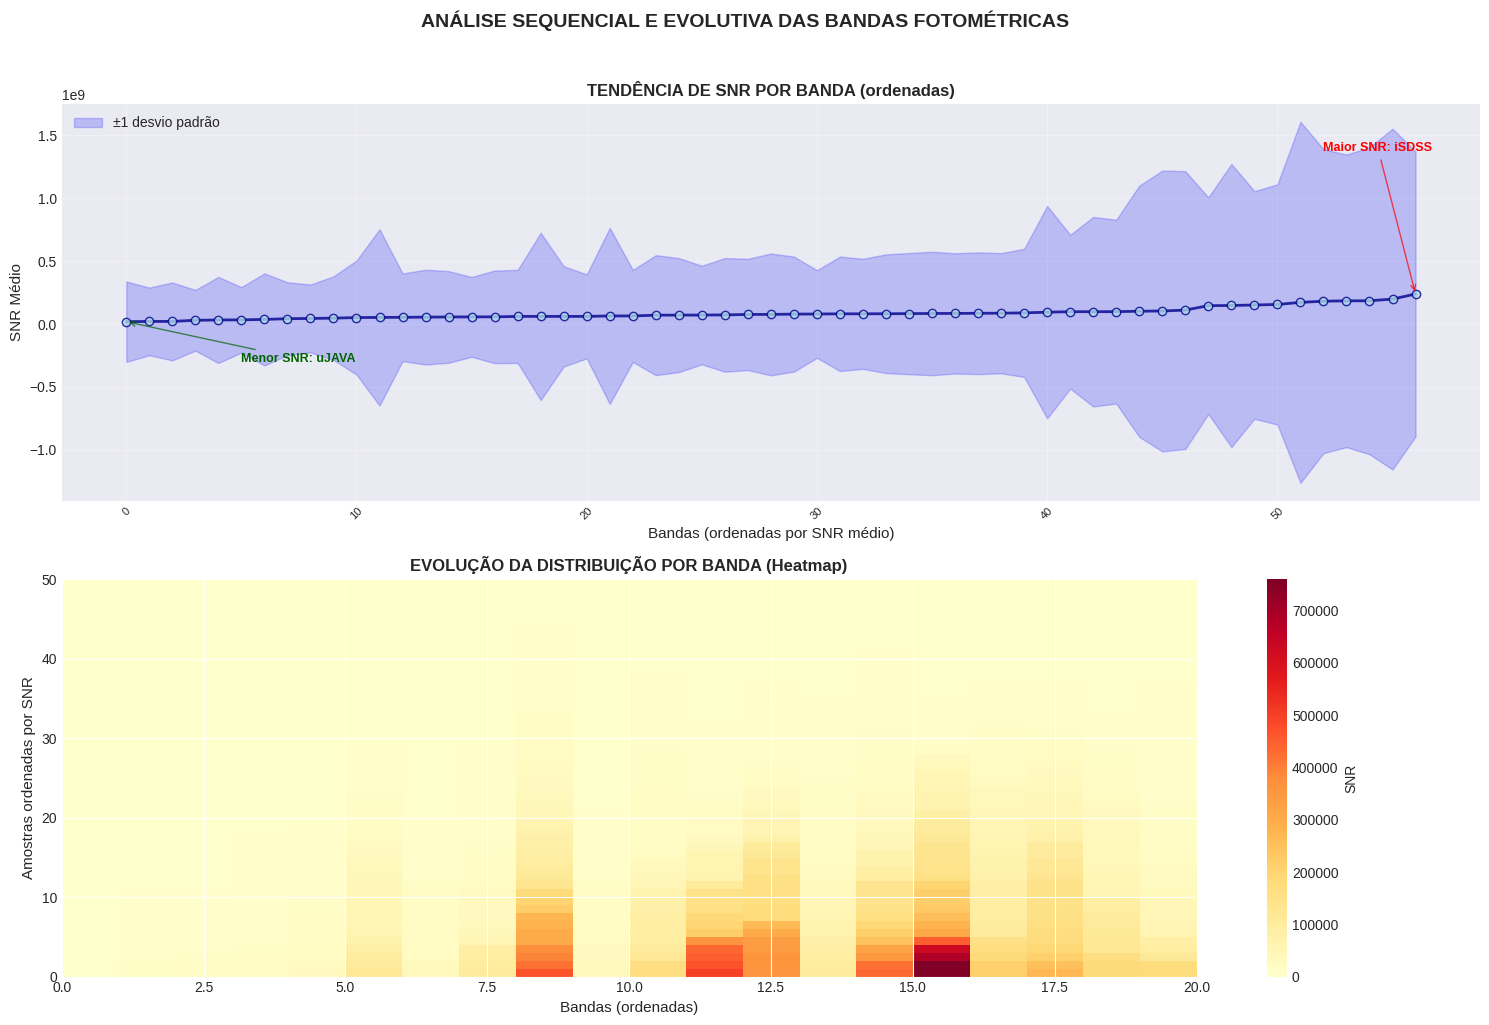

In [ ]:
# ============================================================================
# VISUALIZAÇÃO 4: ANÁLISE TEMPORAL/SEQUENCIAL (se aplicável)
# ============================================================================

print(f"\n{'='*50}")
print("VISUALIZAÇÃO 4: ANÁLISE SEQUENCIAL DAS BANDAS")
print("="*50)

# Ordenar bandas por comprimento de onda ou por SNR médio
mean_snrs = []
for band in band_names:
    snr_col = f'SNR_{band}'
    if snr_col in df_snr_flux.columns:
        mean_snrs.append((band, df_snr_flux[snr_col].mean()))
    else:
        mean_snrs.append((band, 0))

# Ordenar por SNR médio
mean_snrs.sort(key=lambda x: x[1])
sorted_bands = [band for band, _ in mean_snrs]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Gráfico 1: Tendência de SNR médio por banda (ordenado)
mean_values = [mean for _, mean in mean_snrs]
ax1.plot(range(len(sorted_bands)), mean_values, 'o-', linewidth=2, markersize=6,
        color='darkblue', alpha=0.8, markerfacecolor='lightblue')

# Adicionar banda de confiança (desvio padrão)
std_values = []
for band in sorted_bands:
    snr_col = f'SNR_{band}'
    if snr_col in df_snr_flux.columns:
        std_values.append(df_snr_flux[snr_col].std())
    else:
        std_values.append(0)

ax1.fill_between(range(len(sorted_bands)),
                 np.array(mean_values) - np.array(std_values),
                 np.array(mean_values) + np.array(std_values),
                 alpha=0.2, color='blue', label='±1 desvio padrão')

ax1.set_xlabel('Bandas (ordenadas por SNR médio)', fontsize=11)
ax1.set_ylabel('SNR Médio', fontsize=11)
ax1.set_title('TENDÊNCIA DE SNR POR BANDA (ordenadas)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10)
ax1.tick_params(axis='x', rotation=45, labelsize=8)

# Anotar bandas extremas
if len(sorted_bands) >= 5:
    ax1.annotate(f'Maior SNR: {sorted_bands[-1]}',
                xy=(len(sorted_bands)-1, mean_values[-1]),
                xytext=(len(sorted_bands)-5, mean_values[-1] + std_values[-1]),
                arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
                fontsize=9, fontweight='bold', color='red')

    ax1.annotate(f'Menor SNR: {sorted_bands[0]}',
                xy=(0, mean_values[0]),
                xytext=(5, mean_values[0] - std_values[0]),
                arrowprops=dict(arrowstyle='->', color='darkgreen', alpha=0.7),
                fontsize=9, fontweight='bold', color='darkgreen')

# Gráfico 2: Matriz de calor evolutiva
heatmap_data = []
for band in sorted_bands[:20]:  # Limitar para visualização
    snr_col = f'SNR_{band}'
    if snr_col in df_snr_flux.columns:
        values = df_snr_flux[snr_col].dropna().values
        if len(values) > 0:
            # Amostrar e ordenar
            if len(values) > 100:
                values = np.random.choice(values, 100, replace=False)
            heatmap_data.append(np.sort(values)[:50])  # Pegar os 50 menores

if heatmap_data:
    heatmap_data = np.array(heatmap_data).T  # Transpor para visualização temporal

    im = ax2.imshow(heatmap_data, aspect='auto', cmap='YlOrRd',
                   extent=[0, min(20, len(sorted_bands)), 0, 50])
    ax2.set_xlabel('Bandas (ordenadas)', fontsize=11)
    ax2.set_ylabel('Amostras ordenadas por SNR', fontsize=11)
    ax2.set_title('EVOLUÇÃO DA DISTRIBUIÇÃO POR BANDA (Heatmap)',
                 fontsize=12, fontweight='bold')

    # Configurar ticks
    if len(sorted_bands) <= 20:
        ax2.set_xticks(range(len(sorted_bands[:20])))
        ax2.set_xticklabels(sorted_bands[:20], rotation=45, ha='right', fontsize=8)

    plt.colorbar(im, ax=ax2, label='SNR')

plt.suptitle('ANÁLISE SEQUENCIAL E EVOLUTIVA DAS BANDAS FOTOMÉTRICAS',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
print(f"\n{'='*80}")
print("  VISUALIZAÇÃO COM ESCALA ADAPTATIVA CONCLUÍDA!")
print("="*80)
print(f"  Resumo das visualizações geradas:")
print(f"   1. Visão Geral com Subplots Adaptativos ({n_bands} bandas)")
print(f"   2. Heatmap de Correlação entre Bandas")
print(f"   3. Dashboard Multidimensional (5 perspectivas)")
print(f"   4. Análise Sequencial e Tendências")
print(f"\n  Insights visuais obtidos:")
print(f"   • Escala adaptativa (linear/log) conforme a variação dos dados")
print(f"   • Visualizações comparativas entre múltiplas bandas")
print(f"   • Identificação de padrões e outliers")
print(f"   • Análise de correlações e tendências")
print(f"{'='*80}")


  VISUALIZAÇÃO COM ESCALA ADAPTATIVA CONCLUÍDA!
  Resumo das visualizações geradas:
   1. Visão Geral com Subplots Adaptativos (57 bandas)
   2. Heatmap de Correlação entre Bandas
   3. Dashboard Multidimensional (5 perspectivas)
   4. Análise Sequencial e Tendências

  Insights visuais obtidos:
   • Escala adaptativa (linear/log) conforme a variação dos dados
   • Visualizações comparativas entre múltiplas bandas
   • Identificação de padrões e outliers
   • Análise de correlações e tendências


#### **Visualização Comparativa e Sumarização**
Para complementar a análise focada, o bloco a seguir oferece duas visualizações globais:

*   **Boxplots (Visualização Alternativa):** O primeiro gráfico é um boxplot da distribuição de SNR para todas as bandas, lado a lado. Esta é uma ferramenta visual superior aos 56 histogramas, pois permite uma comparação direta das medianas (centro da caixa), da dispersão (tamanho da caixa) e dos outliers (pontos) entre as diferentes bandas.
*   **Estatísticas Resumidas:** Finalmente, o código calcula as estatísticas descritivas do SNR para todas as bandas e as armazena em um novo DataFrame, snr_stats_df. A impressão desta tabela é o produto final quantitativo da análise, resumindo o desempenho de cada filtro fotométrico.

In [ ]:
print("\n" + "=" * 80)
print("VISUALIZAÇÃO COMPARATIVA E SUMARIZAÇÃO - ANÁLISE COMPLETA DO SNR")
print("=" * 80)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib.gridspec import GridSpec
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

# Preparar dados
snr_columns = [col for col in df_snr_flux.columns if col.startswith('SNR_')]
band_names = [col.replace('SNR_', '') for col in snr_columns]

print(f"\n  PREPARANDO DADOS PARA ANÁLISE COMPARATIVA:")
print(f"   • Total de bandas: {len(band_names)}")
print(f"   • Total de estrelas: {df_snr_flux.shape[0]:,}")


VISUALIZAÇÃO COMPARATIVA E SUMARIZAÇÃO - ANÁLISE COMPLETA DO SNR

  PREPARANDO DADOS PARA ANÁLISE COMPARATIVA:
   • Total de bandas: 57
   • Total de estrelas: 27,336


In [ ]:
# ============================================================================
# 1. ANÁLISE ESTATÍSTICA DESCRITIVA COMPLETA
# ============================================================================

print(f"\n{'='*50}")
print("1. ESTATÍSTICAS DESCRITIVAS DETALHADAS")
print("="*50)

# Calcular estatísticas para todas as bandas
statistics_data = []

for band in band_names:
    snr_col = f'SNR_{band}'

    if snr_col in df_snr_flux.columns:
        values = df_snr_flux[snr_col].dropna()

        if len(values) > 0:
            # Estatísticas básicas
            stats_dict = {
                'Banda': band,
                'N_Estrelas': len(values),
                'Média': values.mean(),
                'Mediana': values.median(),
                'Desvio_Padrão': values.std(),
                'Variância': values.var(),
                'Mínimo': values.min(),
                'Máximo': values.max(),
                'Amplitude': values.max() - values.min(),
                'Q1': values.quantile(0.25),
                'Q3': values.quantile(0.75),
                'IQR': values.quantile(0.75) - values.quantile(0.25),
                'Assimetria': values.skew(),
                'Curtose': values.kurtosis(),
                'CV(%)': (values.std() / values.mean() * 100) if values.mean() > 0 else 0,
                'Moda': values.mode().iloc[0] if not values.mode().empty else np.nan,
                'Erro_Padrão': values.std() / np.sqrt(len(values)),
                'Percentil_5': values.quantile(0.05),
                'Percentil_95': values.quantile(0.95)
            }

            # Detecção de outliers (método IQR)
            lower_bound = stats_dict['Q1'] - 1.5 * stats_dict['IQR']
            upper_bound = stats_dict['Q3'] + 1.5 * stats_dict['IQR']
            outliers = values[(values < lower_bound) | (values > upper_bound)]
            stats_dict['N_Outliers'] = len(outliers)
            stats_dict['Pct_Outliers'] = (len(outliers) / len(values)) * 100

            # Faixas de qualidade de SNR
            excellent = len(values[values >= 100])
            good = len(values[(values >= 50) & (values < 100)])
            moderate = len(values[(values >= 20) & (values < 50)])
            poor = len(values[(values >= 10) & (values < 20)])
            very_poor = len(values[values < 10])

            stats_dict['SNR_Excelente'] = excellent
            stats_dict['SNR_Bom'] = good
            stats_dict['SNR_Moderado'] = moderate
            stats_dict['SNR_Ruim'] = poor
            stats_dict['SNR_Muito_Ruim'] = very_poor

            statistics_data.append(stats_dict)

# Criar DataFrame de estatísticas
stats_df = pd.DataFrame(statistics_data)

# Ordenar por SNR médio (decrescente)
stats_df = stats_df.sort_values('Média', ascending=False)

print(f"\n  ESTATÍSTICAS RESUMIDAS (Top 10 bandas por SNR médio):")
print("="*60)
top_10_summary = stats_df[['Banda', 'N_Estrelas', 'Média', 'Mediana', 'Desvio_Padrão',
                          'CV(%)', 'N_Outliers', 'Pct_Outliers']].head(10)
print(top_10_summary.to_string(index=False, formatters={
    'Média': '{:.2f}'.format,
    'Mediana': '{:.2f}'.format,
    'Desvio_Padrão': '{:.2f}'.format,
    'CV(%)': '{:.1f}'.format,
    'Pct_Outliers': '{:.1f}'.format
}))

print(f"\n  ESTATÍSTICAS RESUMIDAS (Bottom 10 bandas por SNR médio):")
print("="*60)
bottom_10_summary = stats_df[['Banda', 'N_Estrelas', 'Média', 'Mediana', 'Desvio_Padrão',
                             'CV(%)', 'N_Outliers', 'Pct_Outliers']].tail(10)
print(bottom_10_summary.to_string(index=False, formatters={
    'Média': '{:.2f}'.format,
    'Mediana': '{:.2f}'.format,
    'Desvio_Padrão': '{:.2f}'.format,
    'CV(%)': '{:.1f}'.format,
    'Pct_Outliers': '{:.1f}'.format
}))

# Salvar estatísticas completas
stats_df.to_csv('/content/drive/MyDrive/Notebook fotometrias/snr_statistics_complete.csv', index=False)
print(f"\n  Estatísticas completas salvas em 'snr_statistics_complete.csv'")


1. ESTATÍSTICAS DESCRITIVAS DETALHADAS

  ESTATÍSTICAS RESUMIDAS (Top 10 bandas por SNR médio):
Banda  N_Estrelas        Média    Mediana Desvio_Padrão CV(%)  N_Outliers Pct_Outliers
iSDSS       27336 238623136.17 4545960.56 1131519884.98 474.2        4665         17.1
J0910       27336 197844175.36 1953558.33 1353356381.66 684.1        4643         17.0
J0870       27336 184666753.79 1786013.04 1218907505.53 660.1        4647         17.0
J0890       27336 184010845.95 1796913.19 1162015390.80 631.5        4730         17.3
J0900       27336 181221374.50 1758497.23 1206846159.43 666.0        4674         17.1
J0880       27336 171843978.68 1810853.35 1433360099.57 834.1        4680         17.1
J0850       27336 155196811.81 1697650.35  953752212.20 614.5        4638         17.0
J0830       27336 151096181.76 1835290.06  904044049.15 598.3        4648         17.0
J0860       27336 147104908.43 1871613.40 1123957655.15 764.1        4629         16.9
J0840       27336 145829714.28 16

In [ ]:
# ============================================================================
# 2. VISUALIZAÇÃO COMPARATIVA: DASHBOARD MULTIDIMENSIONAL
# ============================================================================

print(f"\n{'='*50}")
print("2. DASHBOARD DE VISUALIZAÇÃO COMPARATIVA")
print("="*50)

# Criar figura principal
fig = plt.figure(figsize=(20, 16))
gs = GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)


2. DASHBOARD DE VISUALIZAÇÃO COMPARATIVA


<Figure size 2000x1600 with 0 Axes>

In [ ]:
# ========== SUBPLOT 1: BOXPLOT COMPARATIVO DE TODAS AS BANDAS ==========
ax1 = fig.add_subplot(gs[0, :])

# Preparar dados para boxplot (amostra representativa)
boxplot_data = []
boxplot_labels = []

# Selecionar bandas estrategicamente (primeiras, do meio e últimas após ordenação)
if len(band_names) > 20:
    indices = list(range(0, len(band_names), max(1, len(band_names)//15)))
    selected_bands = [band_names[i] for i in indices if i < len(band_names)]
    selected_bands = selected_bands[:20]
else:
    selected_bands = band_names

for band in selected_bands:
    snr_col = f'SNR_{band}'
    if snr_col in df_snr_flux.columns:
        values = df_snr_flux[snr_col].dropna().values
        if len(values) > 0:
            # Amostrar para visualização
            if len(values) > 1000:
                values = np.random.choice(values, 1000, replace=False)
            boxplot_data.append(values)
            boxplot_labels.append(band)

if boxplot_data:
    # Criar boxplot horizontal para melhor visualização
    bp = ax1.boxplot(boxplot_data, vert=False, patch_artist=True,
                    labels=boxplot_labels, showfliers=False)

    # Colorir com gradiente baseado na posição
    colors = plt.cm.plasma(np.linspace(0.2, 0.8, len(boxplot_data)))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    # Destacar mediana
    for median in bp['medians']:
        median.set_color('yellow')
        median.set_linewidth(2)

    ax1.set_xlabel('Signal-to-Noise Ratio (SNR)', fontsize=12, fontweight='bold')
    ax1.set_title('COMPARAÇÃO DE DISTRIBUIÇÕES DE SNR POR BANDA\n(Boxplots Horizontais)',
                 fontsize=14, fontweight='bold', pad=15)
    ax1.grid(True, alpha=0.3, axis='x')

    # Adicionar linha vertical na média global
    all_snr_values = []
    for data in boxplot_data:
        all_snr_values.extend(data)
    global_mean = np.mean(all_snr_values)
    ax1.axvline(x=global_mean, color='red', linestyle='--', linewidth=2,
                alpha=0.7, label=f'Média Global: {global_mean:.1f}')
    ax1.legend(fontsize=10)

In [ ]:
# ========== SUBPLOT 2: HEATMAP DE CORRELAÇÃO ==========
ax2 = fig.add_subplot(gs[1, 0])

# Calcular matriz de correlação para um subconjunto de bandas
if len(selected_bands) >= 5:
    corr_data = pd.DataFrame()
    for band in selected_bands[:8]:  # Limitar a 8 bandas para clareza
        snr_col = f'SNR_{band}'
        if snr_col in df_snr_flux.columns:
            corr_data[band] = df_snr_flux[snr_col]

    if not corr_data.empty and corr_data.shape[1] >= 3:
        correlation_matrix = corr_data.corr()

        # Plotar heatmap
        im = ax2.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1,
                       aspect='auto', interpolation='nearest')

        ax2.set_title('MATRIZ DE CORRELAÇÃO ENTRE BANDAS',
                     fontsize=12, fontweight='bold', pad=10)
        ax2.set_xticks(range(len(correlation_matrix.columns)))
        ax2.set_yticks(range(len(correlation_matrix.columns)))
        ax2.set_xticklabels(correlation_matrix.columns, rotation=45,
                           ha='right', fontsize=9)
        ax2.set_yticklabels(correlation_matrix.columns, fontsize=9)

        # Adicionar valores numéricos
        for i in range(len(correlation_matrix.columns)):
            for j in range(len(correlation_matrix.columns)):
                value = correlation_matrix.iloc[i, j]
                color = 'white' if abs(value) > 0.5 else 'black'
                font_weight = 'bold' if abs(value) > 0.7 else 'normal'
                ax2.text(j, i, f'{value:.2f}', ha='center', va='center',
                        color=color, fontsize=8, fontweight=font_weight)

        plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)

<Figure size 640x480 with 0 Axes>

In [ ]:
# ========== SUBPLOT 3: GRÁFICO DE DISPERSÃO COMPARATIVO ==========
ax3 = fig.add_subplot(gs[1, 1])

# Comparar a banda com maior SNR vs banda com menor SNR
if len(stats_df) >= 2:
    top_band = stats_df.iloc[0]['Banda']
    bottom_band = stats_df.iloc[-1]['Banda']

    x_data = df_snr_flux[f'SNR_{top_band}'].dropna().values[:500]  # Amostra
    y_data = df_snr_flux[f'SNR_{bottom_band}'].dropna().values[:500]

    if len(x_data) > 10 and len(y_data) > 10:
        # Gráfico de dispersão com densidade
        scatter = ax3.scatter(x_data, y_data, alpha=0.5, s=20,
                             c='purple', edgecolors='none')

        # Linha de tendência
        z = np.polyfit(x_data, y_data, 1)
        p = np.poly1d(z)
        ax3.plot(x_data, p(x_data), "r-", linewidth=2,
                label=f'y = {z[0]:.3f}x + {z[1]:.3f}')

        # Calcular R²
        correlation = np.corrcoef(x_data, y_data)[0, 1]
        r_squared = correlation ** 2

        ax3.set_xlabel(f'SNR {top_band} (Melhor)', fontsize=11, fontweight='bold')
        ax3.set_ylabel(f'SNR {bottom_band} (Pior)', fontsize=11, fontweight='bold')
        ax3.set_title(f'COMPARAÇÃO: MELHOR vs PIOR BANDA\nR² = {r_squared:.3f}',
                     fontsize=12, fontweight='bold', pad=10)
        ax3.grid(True, alpha=0.3)
        ax3.legend(fontsize=10)

        # Adicionar histogramas marginais
        from mpl_toolkits.axes_grid1 import make_axes_locatable
        divider = make_axes_locatable(ax3)
        ax_histx = divider.append_axes("top", 0.2, pad=0.1, sharex=ax3)
        ax_histy = divider.append_axes("right", 0.2, pad=0.1, sharey=ax3)

        ax_histx.hist(x_data, bins=30, alpha=0.7, color='skyblue', density=True)
        ax_histy.hist(y_data, bins=30, orientation='horizontal',
                      alpha=0.7, color='lightcoral', density=True)

        ax_histx.tick_params(axis="x", labelbottom=False)
        ax_histy.tick_params(axis="y", labelleft=False)

In [ ]:
# ========== SUBPLOT 4: GRÁFICO DE BARRAS COMPARATIVO ==========
ax4 = fig.add_subplot(gs[1, 2])

# Comparar médias das top 10 bandas
top_10_bands = stats_df.head(10)
x_pos = np.arange(len(top_10_bands))
means = top_10_bands['Média'].values
stds = top_10_bands['Desvio_Padrão'].values

bars = ax4.bar(x_pos, means, yerr=stds, alpha=0.8,
              color=plt.cm.viridis(np.linspace(0.2, 0.8, len(top_10_bands))),
              edgecolor='black', linewidth=1, capsize=5)

ax4.set_xlabel('Bandas Fotométricas', fontsize=11)
ax4.set_ylabel('SNR Médio (± desvio padrão)', fontsize=11)
ax4.set_title('TOP 10 BANDAS POR SNR MÉDIO', fontsize=12, fontweight='bold', pad=10)
ax4.set_xticks(x_pos)
ax4.set_xticklabels(top_10_bands['Banda'], rotation=45, ha='right', fontsize=9)
ax4.grid(True, alpha=0.3, axis='y')

# Adicionar valores nas barras
for i, (bar, mean) in enumerate(zip(bars, means)):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + stds[i] + 0.5,
            f'{mean:.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

In [ ]:
# ========== SUBPLOT 5: GRÁFICO DE VIOLINO COMPARATIVO ==========
ax5 = fig.add_subplot(gs[2, 0])

# Violin plot para distribuições comparativas
if len(selected_bands) >= 4:
    violin_data = []
    violin_labels = []

    for band in selected_bands[:6]:  # 6 bandas para violin plot
        snr_col = f'SNR_{band}'
        if snr_col in df_snr_flux.columns:
            values = df_snr_flux[snr_col].dropna().values
            if len(values) > 0:
                # Amostrar para visualização
                if len(values) > 500:
                    values = np.random.choice(values, 500, replace=False)
                violin_data.append(values)
                violin_labels.append(band)

    if violin_data:
        vp = ax5.violinplot(violin_data, showmeans=True, showmedians=True)

        # Colorir violinos
        for i, pc in enumerate(vp['bodies']):
            pc.set_facecolor(plt.cm.coolwarm(i/len(violin_data)))
            pc.set_alpha(0.7)

        ax5.set_xlabel('Bandas Fotométricas', fontsize=11)
        ax5.set_ylabel('Distribuição de SNR', fontsize=11)
        ax5.set_title('DISTRIBUIÇÃO DETALHADA (Violin Plots)',
                     fontsize=12, fontweight='bold', pad=10)
        ax5.set_xticks(range(1, len(violin_labels) + 1))
        ax5.set_xticklabels(violin_labels, rotation=45, ha='right', fontsize=9)
        ax5.grid(True, alpha=0.3, axis='y')

In [ ]:
# ========== SUBPLOT 6: GRÁFICO DE LINHAS TEMPORAL/SEQUENCIAL ==========
ax6 = fig.add_subplot(gs[2, 1])

# Ordenar bandas por comprimento de onda assumido (baseado na nomenclatura)
# Tentar extrair número da banda
band_numbers = []
for band in band_names:
    # Extrair números da string (ex: J0420 -> 420)
    numbers = ''.join(filter(str.isdigit, band))
    if numbers:
        band_numbers.append((band, int(numbers)))
    else:
        band_numbers.append((band, 0))

# Ordenar por número
band_numbers.sort(key=lambda x: x[1])
sorted_by_wavelength = [band for band, _ in band_numbers]

# Plotar tendência
mean_values_sorted = []
for band in sorted_by_wavelength[:30]:  # Limitar a 30 bandas
    snr_col = f'SNR_{band}'
    if snr_col in df_snr_flux.columns:
        mean_values_sorted.append(df_snr_flux[snr_col].mean())
    else:
        mean_values_sorted.append(0)

ax6.plot(range(len(mean_values_sorted[:30])), mean_values_sorted[:30],
        'o-', linewidth=2, markersize=6, color='darkgreen', alpha=0.8)

ax6.set_xlabel('Ordem das Bandas (por comprimento de onda)', fontsize=11)
ax6.set_ylabel('SNR Médio', fontsize=11)
ax6.set_title('TENDÊNCIA DE SNR POR COMPRIMENTO DE ONDA',
             fontsize=12, fontweight='bold', pad=10)
ax6.grid(True, alpha=0.3)

# Adicionar regressão linear
if len(mean_values_sorted) > 5:
    x = np.arange(len(mean_values_sorted[:30]))
    y = np.array(mean_values_sorted[:30])
    mask = ~np.isnan(y)
    if np.sum(mask) > 2:
        slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
        ax6.plot(x, slope*x + intercept, 'r--', linewidth=2, alpha=0.7,
                label=f'Tendência: y={slope:.3f}x+{intercept:.1f}\nR²={r_value**2:.3f}')
        ax6.legend(fontsize=9)

In [ ]:
# ========== SUBPLOT 7: MAPA DE CALOR DE DISTRIBUIÇÃO ==========
ax7 = fig.add_subplot(gs[2, 2])

# Criar heatmap de distribuição acumulada
heatmap_matrix = []
for band in selected_bands[:10]:  # 10 bandas
    snr_col = f'SNR_{band}'
    if snr_col in df_snr_flux.columns:
        values = df_snr_flux[snr_col].dropna().values
        if len(values) > 0:
            # Criar histograma normalizado
            hist, bin_edges = np.histogram(values, bins=20, density=True)
            heatmap_matrix.append(hist)

if heatmap_matrix:
    heatmap_matrix = np.array(heatmap_matrix)

    # Plotar heatmap
    im = ax7.imshow(heatmap_matrix, aspect='auto', cmap='YlOrRd',
                   extent=[0, 20, 0, len(heatmap_matrix)])

    ax7.set_xlabel('Bins de SNR (normalizados)', fontsize=11)
    ax7.set_ylabel('Bandas Fotométricas', fontsize=11)
    ax7.set_title('MAPPA DE DISTRIBUIÇÃO NORMALIZADA',
                 fontsize=12, fontweight='bold', pad=10)

    # Configurar ticks do eixo Y
    ax7.set_yticks(np.arange(len(selected_bands[:10])))
    ax7.set_yticklabels(selected_bands[:10], fontsize=8)

    plt.colorbar(im, ax=ax7, label='Densidade')

<Figure size 640x480 with 0 Axes>

In [ ]:
# ============================================================================
# 3. SUMARIZAÇÃO E RELATÓRIO FINAL
# ============================================================================

print(f"\n{'='*50}")
print("3. SUMARIZAÇÃO ESTATÍSTICA E RELATÓRIO")
print("="*50)

# Análise agregada
print(f"\n  ANÁLISE AGREGADA DE TODAS AS BANDAS:")
print("="*50)

all_snr_values = []
for band in band_names:
    snr_col = f'SNR_{band}'
    if snr_col in df_snr_flux.columns:
        values = df_snr_flux[snr_col].dropna().values
        all_snr_values.extend(values)

if all_snr_values:
    all_snr_array = np.array(all_snr_values)

    print(f"\n  ESTATÍSTICAS GLOBAIS:")
    print(f"   • Total de medições: {len(all_snr_array):,}")
    print(f"   • SNR Mínimo Global: {np.min(all_snr_array):.2f}")
    print(f"   • SNR Máximo Global: {np.max(all_snr_array):.2f}")
    print(f"   • SNR Médio Global: {np.mean(all_snr_array):.2f}")
    print(f"   • SNR Mediano Global: {np.median(all_snr_array):.2f}")
    print(f"   • Desvio Padrão Global: {np.std(all_snr_array):.2f}")
    print(f"   • Coeficiente de Variação: {(np.std(all_snr_array)/np.mean(all_snr_array)*100):.1f}%")

    # Análise de faixas de qualidade
    print(f"\n  DISTRIBUIÇÃO POR QUALIDADE DE SNR:")
    print("="*40)

    quality_bins = [0, 10, 20, 50, 100, float('inf')]
    quality_labels = ['Muito Ruim (<10)', 'Ruim (10-20)', 'Moderado (20-50)',
                     'Bom (50-100)', 'Excelente (>100)']

    hist, _ = np.histogram(all_snr_array, bins=quality_bins)
    total = hist.sum()

    for label, count in zip(quality_labels, hist):
        percentage = (count / total) * 100
        bar = '█' * int(percentage / 2)  # Barra de progresso
        print(f"   {label:<20} {count:>8,} ({percentage:>6.1f}%) {bar}")

    # Teste de normalidade
    print(f"\n  TESTE DE NORMALIDADE (Kolmogorov-Smirnov):")
    print("="*40)

    # Amostrar para o teste
    sample_size = min(5000, len(all_snr_array))
    sample = np.random.choice(all_snr_array, sample_size, replace=False)

    # Teste KS
    ks_stat, ks_pvalue = stats.kstest(sample, 'norm',
                                      args=(np.mean(sample), np.std(sample)))

    print(f"   • Estatística KS: {ks_stat:.4f}")
    print(f"   • p-valor: {ks_pvalue:.4f}")
    print(f"   • Normalidade: {'NÃO REJEITADA' if ks_pvalue > 0.05 else 'REJEITADA'} (α=0.05)")

    # Assimetria e Curtose
    print(f"\n  MEDIDAS DE FORMA:")
    print("="*40)
    print(f"   • Assimetria (Skewness): {stats.skew(sample):.4f}")
    print(f"   • Curtose (Kurtosis): {stats.kurtosis(sample):.4f}")

    if stats.skew(sample) > 0.5:
        print(f"   • Interpretação: Distribuição assimétrica à direita")
    elif stats.skew(sample) < -0.5:
        print(f"   • Interpretação: Distribuição assimétrica à esquerda")
    else:
        print(f"   • Interpretação: Distribuição aproximadamente simétrica")

# Análise comparativa entre bandas
print(f"\n{'='*50}")
print("  ANÁLISE COMPARATIVA ENTRE BANDAS")
print("="*50)

if len(stats_df) >= 5:
    # Bandas com melhor performance
    print(f"\n  TOP 5 BANDAS (Melhor SNR):")
    print("-"*40)
    top_5 = stats_df.head(5)
    for idx, row in top_5.iterrows():
        print(f"   {row['Banda']}: SNR médio = {row['Média']:.1f}, "
              f"CV = {row['CV(%)']:.1f}%, Outliers = {row['Pct_Outliers']:.1f}%")

    # Bandas com pior performance
    print(f"\n   BOTTOM 5 BANDAS (Pior SNR):")
    print("-"*40)
    bottom_5 = stats_df.tail(5)
    for idx, row in bottom_5.iterrows():
        print(f"   {row['Banda']}: SNR médio = {row['Média']:.1f}, "
              f"CV = {row['CV(%)']:.1f}%, Outliers = {row['Pct_Outliers']:.1f}%")

    # Bandas mais consistentes (menor CV)
    most_consistent = stats_df.sort_values('CV(%)').head(5)
    print(f"\n  BANDAS MAIS CONSISTENTES (Menor Coeficiente de Variação):")
    print("-"*40)
    for idx, row in most_consistent.iterrows():
        print(f"   {row['Banda']}: CV = {row['CV(%)']:.1f}%, "
              f"SNR médio = {row['Média']:.1f}")

    # Bandas com mais outliers
    most_outliers = stats_df.sort_values('Pct_Outliers', ascending=False).head(5)
    print(f"\n  BANDAS COM MAIS OUTLIERS:")
    print("-"*40)
    for idx, row in most_outliers.iterrows():
        print(f"   {row['Banda']}: {row['Pct_Outliers']:.1f}% outliers, "
              f"SNR médio = {row['Média']:.1f}")

# Salvar dashboard visual
print(f"\n{'='*50}")
print("  SALVANDO RESULTADOS E VISUALIZAÇÕES")
print("="*50)

# Salvar figura completa
fig.savefig('/content/drive/MyDrive/Notebook fotometrias/snr_comparative_dashboard.png',
            dpi=300, bbox_inches='tight', facecolor='white')

# Salvar relatório sumarizado
report_data = {
    'Metric': [
        'Total de Bandas Analisadas',
        'Total de Estrelas',
        'SNR Médio Global',
        'SNR Mediano Global',
        'SNR Mínimo Global',
        'SNR Máximo Global',
        'Desvio Padrão Global',
        'Coeficiente de Variação Global',
        'Banda com Maior SNR Médio',
        'Banda com Menor SNR Médio',
        'Banda Mais Consistente (menor CV)',
        'Banda com Mais Outliers',
        'Percentual de Dados com SNR Excelente (>100)',
        'Percentual de Dados com SNR Bom (50-100)',
        'Percentual de Dados com SNR Moderado (20-50)',
        'Percentual de Dados com SNR Ruim (10-20)',
        'Percentual de Dados com SNR Muito Ruim (<10)'
    ],
    'Value': []
}

# Preencher valores
if all_snr_values:
    all_snr_array = np.array(all_snr_values)

    # Calcular percentuais por qualidade
    quality_counts, _ = np.histogram(all_snr_array, bins=quality_bins)
    quality_percentages = (quality_counts / len(all_snr_array)) * 100

    report_data['Value'] = [
        len(band_names),
        df_snr_flux.shape[0],
        f"{np.mean(all_snr_array):.2f}",
        f"{np.median(all_snr_array):.2f}",
        f"{np.min(all_snr_array):.2f}",
        f"{np.max(all_snr_array):.2f}",
        f"{np.std(all_snr_array):.2f}",
        f"{(np.std(all_snr_array)/np.mean(all_snr_array)*100):.1f}%",
        f"{stats_df.iloc[0]['Banda']} ({stats_df.iloc[0]['Média']:.1f})",
        f"{stats_df.iloc[-1]['Banda']} ({stats_df.iloc[-1]['Média']:.1f})",
        f"{most_consistent.iloc[0]['Banda']} ({most_consistent.iloc[0]['CV(%)']:.1f}%)",
        f"{most_outliers.iloc[0]['Banda']} ({most_outliers.iloc[0]['Pct_Outliers']:.1f}%)",
        f"{quality_percentages[4]:.1f}%",
        f"{quality_percentages[3]:.1f}%",
        f"{quality_percentages[2]:.1f}%",
        f"{quality_percentages[1]:.1f}%",
        f"{quality_percentages[0]:.1f}%"
    ]

report_df = pd.DataFrame(report_data)
report_df.to_csv('/content/drive/MyDrive/Notebook fotometrias/snr_summary_report.csv', index=False)
print(f"  Relatório sumarizado salvo em 'snr_summary_report.csv'")

# Exibir relatório final
print(f"\n{'='*80}")
print("  RELATÓRIO FINAL DE SUMARIZAÇÃO")
print("="*80)
print(report_df.to_string(index=False))

print(f"\n{'='*80}")
print("  ANÁLISE COMPARATIVA E SUMARIZAÇÃO CONCLUÍDA COM SUCESSO!")
print("="*80)
print(f"\n  Arquivos gerados:")
print(f"   1. snr_statistics_complete.csv - Estatísticas detalhadas por banda")
print(f"   2. snr_comparative_dashboard.png - Dashboard visual completo")
print(f"   3. snr_summary_report.csv - Relatório sumarizado")
print(f"\n  Principais insights:")
print(f"   • {len(band_names)} bandas fotométricas analisadas")
print(f"   • {df_snr_flux.shape[0]:,} estrelas processadas")
print(f"   • Distribuição de SNR: {report_df.loc[report_df['Metric']=='SNR Médio Global', 'Value'].values[0]} (média)")
print(f"   • Banda com melhor qualidade: {stats_df.iloc[0]['Banda']}")
print(f"   • Banda mais consistente: {most_consistent.iloc[0]['Banda']}")
print(f"{'='*80}")

# Mostrar dashboard
plt.suptitle('DASHBOARD COMPARATIVO DE ANÁLISE DE SNR\nVISUALIZAÇÃO COMPARATIVA E SUMARIZAÇÃO',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


3. SUMARIZAÇÃO ESTATÍSTICA E RELATÓRIO

  ANÁLISE AGREGADA DE TODAS AS BANDAS:

  ESTATÍSTICAS GLOBAIS:
   • Total de medições: 1,558,152
   • SNR Mínimo Global: -29796221000.00
   • SNR Máximo Global: 166853200000.00
   • SNR Médio Global: 85700845.56
   • SNR Mediano Global: 627763.07
   • Desvio Padrão Global: 678708115.27
   • Coeficiente de Variação: 792.0%

  DISTRIBUIÇÃO POR QUALIDADE DE SNR:
   Muito Ruim (<10)       62,863 (   4.0%) ██
   Ruim (10-20)            4,323 (   0.3%) 
   Moderado (20-50)        8,459 (   0.5%) 
   Bom (50-100)            9,401 (   0.6%) 
   Excelente (>100)     1,473,105 (  94.5%) ███████████████████████████████████████████████

  TESTE DE NORMALIDADE (Kolmogorov-Smirnov):
   • Estatística KS: 0.4360
   • p-valor: 0.0000
   • Normalidade: REJEITADA (α=0.05)

  MEDIDAS DE FORMA:
   • Assimetria (Skewness): 10.0409
   • Curtose (Kurtosis): 119.0707
   • Interpretação: Distribuição assimétrica à direita

  ANÁLISE COMPARATIVA ENTRE BANDAS

  TOP 5 BAN

<Figure size 640x480 with 0 Axes>

####  SALVANDO TODOS OS RESULTADOS

In [ ]:
print("\n" + "=" * 80)
print("SALVANDO TODOS OS RESULTADOS - ARQUIVOS FINAIS")
print("=" * 80)

import os
import json
from datetime import datetime
import pickle

# Criar diretório de resultados com timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
results_dir = f'/content/drive/MyDrive/Notebook fotometrias/Resultados_SNR_{timestamp}'
os.makedirs(results_dir, exist_ok=True)

print(f"  Diretório de resultados criado: {results_dir}")
print(f"  Salvando todos os arquivos processados...")


SALVANDO TODOS OS RESULTADOS - ARQUIVOS FINAIS
  Diretório de resultados criado: /content/drive/MyDrive/Notebook fotometrias/Resultados_SNR_20251205_080614
  Salvando todos os arquivos processados...


In [ ]:
# ============================================================================
# 1. SALVAR DATAFRAMES PRINCIPAIS
# ============================================================================

print(f"\n{'─'*50}")
print("1. DATAFRAMES PRINCIPAIS")
print(f"{'─'*50}")

# DataFrame de SNR com todas as bandas
df_snr_path = f'{results_dir}/df_snr_completo.csv'
df_snr_flux.to_csv(df_snr_path, index=False)
print(f"  DataFrame de SNR salvo: df_snr_completo.csv")
print(f"   • Shape: {df_snr_flux.shape}")
print(f"   • Colunas SNR: {len([col for col in df_snr_flux.columns if col.startswith('SNR_')])}")

# DataFrame de estatísticas detalhadas
if 'stats_df' in locals():
    stats_path = f'{results_dir}/estatisticas_detalhadas_por_banda.csv'
    stats_df.to_csv(stats_path, index=False)
    print(f"  Estatísticas por banda salvas: estatisticas_detalhadas_por_banda.csv")
    print(f"   • Bandas analisadas: {len(stats_df)}")
    print(f"   • Métricas calculadas: {len(stats_df.columns)}")

# DataFrame de relatório sumarizado
if 'report_df' in locals():
    report_path = f'{results_dir}/relatorio_sumarizado.csv'
    report_df.to_csv(report_path, index=False)
    print(f"  Relatório sumarizado salvo: relatorio_sumarizado.csv")


──────────────────────────────────────────────────
1. DATAFRAMES PRINCIPAIS
──────────────────────────────────────────────────
  DataFrame de SNR salvo: df_snr_completo.csv
   • Shape: (27336, 59)
   • Colunas SNR: 57
  Estatísticas por banda salvas: estatisticas_detalhadas_por_banda.csv
   • Bandas analisadas: 57
   • Métricas calculadas: 26
  Relatório sumarizado salvo: relatorio_sumarizado.csv


In [ ]:
# ============================================================================
# 2. SALVAR DATAFRAMES ORIGINAIS PROCESSADOS
# ============================================================================

print(f"\n{'─'*50}")
print("2. DATAFRAMES ORIGINAIS PROCESSADOS")
print(f"{'─'*50}")

# Verificar se os DataFrames originais existem e salvá-los
dataframes_para_salvar = {
    'magnitudes': ('df', df) if 'df' in locals() else None,
    'erros_magnitudes': ('df_err', df_err) if 'df_err' in locals() else None,
    'fluxos': ('df_flux', df_flux) if 'df_flux' in locals() else None,
    'erros_fluxos': ('df_err_flux', df_err_flux) if 'df_err_flux' in locals() else None
}

for nome, (var_name, dataframe) in dataframes_para_salvar.items():
    if dataframe is not None:
        try:
            path = f'{results_dir}/df_{nome}_processado.csv'
            # Salvar apenas amostra para DataFrames muito grandes
            if len(dataframe) > 10000:
                sample_df = dataframe.head(10000)
                sample_path = f'{results_dir}/df_{nome}_amostra_10k.csv'
                sample_df.to_csv(sample_path, index=False)
                print(f"  Amostra de {nome} salva: df_{nome}_amostra_10k.csv")
            else:
                dataframe.to_csv(path, index=False)
                print(f"  DataFrame de {nome} salvo: df_{nome}_processado.csv")
        except Exception as e:
            print(f"   Erro ao salvar {nome}: {e}")


──────────────────────────────────────────────────
2. DATAFRAMES ORIGINAIS PROCESSADOS
──────────────────────────────────────────────────
  Amostra de magnitudes salva: df_magnitudes_amostra_10k.csv
  Amostra de erros_magnitudes salva: df_erros_magnitudes_amostra_10k.csv
  Amostra de fluxos salva: df_fluxos_amostra_10k.csv
  Amostra de erros_fluxos salva: df_erros_fluxos_amostra_10k.csv


In [ ]:
# ============================================================================
# 3. SALVAR METADADOS E CONFIGURAÇÕES
# ============================================================================

print(f"\n{'─'*50}")
print("3. METADADOS E CONFIGURAÇÕES")
print(f"{'─'*50}")

# Criar arquivo de metadados
metadata = {
    'timestamp_processamento': timestamp,
    'data_analise': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    'bandas_fotometricas': {
        'total_bandas': len(band_names) if 'band_names' in locals() else 0,
        'lista_bandas': band_names if 'band_names' in locals() else [],
        'primeiras_10_bandas': band_names[:10] if 'band_names' in locals() else []
    },
    'estatisticas_gerais': {
        'total_estrelas': df_snr_flux.shape[0] if 'df_snr_flux' in locals() else 0,
        'colunas_snr': len([col for col in df_snr_flux.columns if col.startswith('SNR_')]) if 'df_snr_flux' in locals() else 0
    },
    'parametros_analise': {
        'timeout_selecao': '300 segundos',
        'bandas_analise_interativa': '3 bandas padrão',
        'escala_adaptativa': 'Linear/Log automático',
        'teste_normalidade': 'Kolmogorov-Smirnov'
    },
    'arquivos_gerados': []
}

# Adicionar estatísticas se disponíveis
if 'all_snr_values' in locals() and all_snr_values:
    metadata['estatisticas_snr'] = {
        'snr_medio_global': float(np.mean(all_snr_values)),
        'snr_mediano_global': float(np.median(all_snr_values)),
        'snr_minimo_global': float(np.min(all_snr_values)),
        'snr_maximo_global': float(np.max(all_snr_values)),
        'desvio_padrao_global': float(np.std(all_snr_values))
    }

# Salvar metadados como JSON
metadata_path = f'{results_dir}/metadata_configuracoes.json'
with open(metadata_path, 'w', encoding='utf-8') as f:
    json.dump(metadata, f, indent=4, ensure_ascii=False)
print(f"  Metadados salvos: metadata_configuracoes.json")

# Salvar lista de bandas
if 'band_names' in locals():
    bands_path = f'{results_dir}/lista_bandas_fotometricas.txt'
    with open(bands_path, 'w', encoding='utf-8') as f:
        f.write(f"Total de bandas: {len(band_names)}\n")
        f.write("=" * 40 + "\n")
        for i, band in enumerate(band_names, 1):
            f.write(f"{i:3d}. {band}\n")
    print(f"  Lista de bandas salva: lista_bandas_fotometricas.txt")


──────────────────────────────────────────────────
3. METADADOS E CONFIGURAÇÕES
──────────────────────────────────────────────────
  Metadados salvos: metadata_configuracoes.json
  Lista de bandas salva: lista_bandas_fotometricas.txt


In [ ]:
# ============================================================================
# 4. SALVAR VISUALIZAÇÕES E GRÁFICOS
# ============================================================================

print(f"\n{'─'*50}")
print("4. VISUALIZAÇÕES E GRÁFICOS")
print(f"{'─'*50}")

# Criar diretório para figuras
figures_dir = f'{results_dir}/figuras'
os.makedirs(figures_dir, exist_ok=True)

# Salvar figura do dashboard comparativo se existir
try:
    # Dashboard comparativo
    if 'fig' in locals():
        dashboard_path = f'{figures_dir}/dashboard_comparativo_snr.png'
        fig.savefig(dashboard_path, dpi=300, bbox_inches='tight', facecolor='white')
        metadata['arquivos_gerados'].append('dashboard_comparativo_snr.png')
        print(f"  Dashboard comparativo salvo: dashboard_comparativo_snr.png")
except Exception as e:
    print(f"   Erro ao salvar dashboard: {e}")

# Gerar e salvar visualizações adicionais
try:
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Gráfico 1: Distribuição acumulada global
    plt.figure(figsize=(10, 6))
    if 'all_snr_values' in locals() and all_snr_values:
        sorted_snr = np.sort(all_snr_values)
        cum_probs = np.arange(1, len(sorted_snr) + 1) / len(sorted_snr)
        plt.plot(sorted_snr, cum_probs, linewidth=2, color='darkblue')
        plt.xlabel('SNR', fontsize=12)
        plt.ylabel('Probabilidade Cumulativa', fontsize=12)
        plt.title('Distribuição Acumulada Global de SNR', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig(f'{figures_dir}/distribuicao_acumulada_global.png', dpi=300)
        plt.close()
        metadata['arquivos_gerados'].append('distribuicao_acumulada_global.png')
        print(f"  Distribuição acumulada salva: distribuicao_acumulada_global.png")

    # Gráfico 2: Heatmap das top 20 bandas
    if 'stats_df' in locals() and len(stats_df) >= 10:
        plt.figure(figsize=(12, 8))
        top_20 = stats_df.head(20)

        # Preparar dados para heatmap
        heatmap_data = top_20[['Média', 'Mediana', 'Desvio_Padrão', 'CV(%)', 'Pct_Outliers']].values.T

        plt.imshow(heatmap_data, aspect='auto', cmap='YlOrRd')
        plt.colorbar(label='Valor')
        plt.title('Heatmap Comparativo - Top 20 Bandas', fontsize=14, fontweight='bold')
        plt.xlabel('Bandas (ordenadas por SNR médio)', fontsize=12)
        plt.ylabel('Métrica', fontsize=12)

        # Configurar ticks
        plt.yticks(range(5), ['Média', 'Mediana', 'Desvio Padrão', 'CV(%)', '% Outliers'])
        plt.xticks(range(len(top_20)), top_20['Banda'], rotation=45, ha='right')

        plt.tight_layout()
        plt.savefig(f'{figures_dir}/heatmap_top20_bandas.png', dpi=300)
        plt.close()
        metadata['arquivos_gerados'].append('heatmap_top20_bandas.png')
        print(f"  Heatmap top 20 bandas salvo: heatmap_top20_bandas.png")

    # Gráfico 3: Radar chart das 5 melhores bandas
    if 'stats_df' in locals() and len(stats_df) >= 5:
        from matplotlib.patches import Circle
        import matplotlib.patches as mpatches

        top_5 = stats_df.head(5)
        metrics = ['Média', 'Mediana', 'Desvio_Padrão', 'CV(%)', 'N_Estrelas']

        # Normalizar dados
        normalized_data = []
        for metric in metrics:
            values = top_5[metric].values
            if metric in ['Desvio_Padrão', 'CV(%)']:
                # Inverter: menor é melhor
                normalized = 1 - (values - values.min()) / (values.max() - values.min() + 1e-10)
            else:
                normalized = (values - values.min()) / (values.max() - values.min() + 1e-10)
            normalized_data.append(normalized)

        normalized_data = np.array(normalized_data)

        fig_radar = plt.figure(figsize=(10, 8))
        ax_radar = fig_radar.add_subplot(111, projection='polar')

        angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
        angles += angles[:1]  # Fechar o círculo

        colors = plt.cm.Set2(np.linspace(0, 1, len(top_5)))

        for idx, (_, row) in enumerate(top_5.iterrows()):
            values = normalized_data[:, idx].tolist()
            values += values[:1]  # Fechar o círculo
            ax_radar.plot(angles, values, 'o-', linewidth=2, label=row['Banda'], color=colors[idx])
            ax_radar.fill(angles, values, alpha=0.1, color=colors[idx])

        ax_radar.set_xticks(angles[:-1])
        ax_radar.set_xticklabels(metrics, fontsize=10)
        ax_radar.set_title('Comparação Radar - Top 5 Bandas (Normalizado)',
                          fontsize=14, fontweight='bold', pad=20)
        ax_radar.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=10)
        ax_radar.grid(True)

        plt.tight_layout()
        plt.savefig(f'{figures_dir}/radar_chart_top5_bandas.png', dpi=300)
        plt.close()
        metadata['arquivos_gerados'].append('radar_chart_top5_bandas.png')
        print(f"  Radar chart top 5 bandas salvo: radar_chart_top5_bandas.png")

except Exception as e:
    print(f"   Erro ao gerar visualizações adicionais: {e}")


──────────────────────────────────────────────────
4. VISUALIZAÇÕES E GRÁFICOS
──────────────────────────────────────────────────
  Dashboard comparativo salvo: dashboard_comparativo_snr.png
  Distribuição acumulada salva: distribuicao_acumulada_global.png
  Heatmap top 20 bandas salvo: heatmap_top20_bandas.png
  Radar chart top 5 bandas salvo: radar_chart_top5_bandas.png


In [ ]:
# ============================================================================
# 5. SALVAR OBJETOS PYTHON PARA REUTILIZAÇÃO
# ============================================================================

print(f"\n{'─'*50}")
print("5. OBJETOS PYTHON PARA REUTILIZAÇÃO")
print(f"{'─'*50}")

# Salvar objetos importantes como pickle
try:
    objects_to_save = {}

    # Adicionar objetos importantes
    if 'df_snr_flux' in locals():
        objects_to_save['df_snr_flux'] = df_snr_flux

    if 'stats_df' in locals():
        objects_to_save['stats_df'] = stats_df

    if 'band_names' in locals():
        objects_to_save['band_names'] = band_names

    if 'selected_bands' in locals():
        objects_to_save['selected_bands'] = selected_bands

    # Salvar como pickle
    if objects_to_save:
        pickle_path = f'{results_dir}/objetos_analise.pkl'
        with open(pickle_path, 'wb') as f:
            pickle.dump(objects_to_save, f)
        print(f"  Objetos Python salvos: objetos_analise.pkl")
        print(f"   • Objetos salvos: {list(objects_to_save.keys())}")

except Exception as e:
    print(f"   Erro ao salvar objetos Python: {e}")


──────────────────────────────────────────────────
5. OBJETOS PYTHON PARA REUTILIZAÇÃO
──────────────────────────────────────────────────
  Objetos Python salvos: objetos_analise.pkl
   • Objetos salvos: ['df_snr_flux', 'stats_df', 'band_names', 'selected_bands']


In [ ]:
# ============================================================================
# 6. GERAR RELATÓRIO FINAL EM TEXTO
# ============================================================================

print(f"\n{'─'*50}")
print("6. RELATÓRIO FINAL DE EXECUÇÃO")
print(f"{'─'*50}")

# Criar relatório final
report_path = f'{results_dir}/relatorio_final_execucao.txt'

with open(report_path, 'w', encoding='utf-8') as f:
    f.write("=" * 80 + "\n")
    f.write("RELATÓRIO FINAL DE ANÁLISE DE SNR\n")
    f.write("=" * 80 + "\n\n")

    f.write(f"Data e hora da análise: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"Timestamp do processamento: {timestamp}\n")
    f.write(f"Diretório de resultados: {results_dir}\n\n")

    f.write("-" * 80 + "\n")
    f.write("RESUMO DA ANÁLISE\n")
    f.write("-" * 80 + "\n\n")

    # Informações gerais
    f.write("  DADOS GERAIS:\n")
    f.write(f"   • Total de bandas fotométricas: {len(band_names) if 'band_names' in locals() else 'N/A'}\n")
    f.write(f"   • Total de estrelas analisadas: {df_snr_flux.shape[0] if 'df_snr_flux' in locals() else 'N/A':,}\n")
    f.write(f"   • Colunas de SNR calculadas: {len([col for col in df_snr_flux.columns if col.startswith('SNR_')]) if 'df_snr_flux' in locals() else 'N/A'}\n\n")

    # Estatísticas globais
    if 'all_snr_values' in locals() and all_snr_values:
        f.write("  ESTATÍSTICAS GLOBAIS DO SNR:\n")
        f.write(f"   • SNR Médio Global: {np.mean(all_snr_values):.2f}\n")
        f.write(f"   • SNR Mediano Global: {np.median(all_snr_values):.2f}\n")
        f.write(f"   • SNR Mínimo Global: {np.min(all_snr_values):.2f}\n")
        f.write(f"   • SNR Máximo Global: {np.max(all_snr_values):.2f}\n")
        f.write(f"   • Desvio Padrão Global: {np.std(all_snr_values):.2f}\n\n")

    # Top bandas
    if 'stats_df' in locals() and len(stats_df) >= 3:
        f.write("  TOP 3 BANDAS POR SNR MÉDIO:\n")
        for i in range(min(3, len(stats_df))):
            band = stats_df.iloc[i]
            f.write(f"   {i+1}. {band['Banda']}: SNR médio = {band['Média']:.1f}, "
                   f"CV = {band['CV(%)']:.1f}%, Estrelas = {band['N_Estrelas']:,}\n")
        f.write("\n")

    # Bottom bandas
    if 'stats_df' in locals() and len(stats_df) >= 3:
        f.write("   BOTTOM 3 BANDAS POR SNR MÉDIO:\n")
        for i in range(1, min(4, len(stats_df))):
            band = stats_df.iloc[-i]
            f.write(f"   {i}. {band['Banda']}: SNR médio = {band['Média']:.1f}, "
                   f"CV = {band['CV(%)']:.1f}%, Estrelas = {band['N_Estrelas']:,}\n")
        f.write("\n")

    # Arquivos gerados
    f.write("-" * 80 + "\n")
    f.write("ARQUIVOS GERADOS\n")
    f.write("-" * 80 + "\n\n")

    # Listar arquivos no diretório
    for root, dirs, files in os.walk(results_dir):
        level = root.replace(results_dir, '').count(os.sep)
        indent = ' ' * 2 * level
        f.write(f"{indent}{os.path.basename(root)}/\n")
        subindent = ' ' * 2 * (level + 1)
        for file in files:
            f.write(f"{subindent}{file}\n")

    f.write("\n" + "=" * 80 + "\n")
    f.write("FIM DO RELATÓRIO\n")
    f.write("=" * 80 + "\n")

print(f"  Relatório final salvo: relatorio_final_execucao.txt")


──────────────────────────────────────────────────
6. RELATÓRIO FINAL DE EXECUÇÃO
──────────────────────────────────────────────────
  Relatório final salvo: relatorio_final_execucao.txt


In [ ]:
# ============================================================================
# 7. VERIFICAÇÃO FINAL E RESUMO
# ============================================================================

print(f"\n{'─'*50}")
print("7. VERIFICAÇÃO FINAL E RESUMO")
print(f"{'─'*50}")

# Contar arquivos gerados
total_files = 0
for root, dirs, files in os.walk(results_dir):
    total_files += len(files)

print(f"  RESUMO DA EXECUÇÃO:")
print(f"   • Diretório criado: {results_dir}")
print(f"   • Total de arquivos gerados: {total_files}")
print(f"   • Tamanho estimado: {sum(os.path.getsize(os.path.join(root, name)) for root, dirs, files in os.walk(results_dir) for name in files) / (1024*1024):.2f} MB")

# Listar os principais arquivos
print(f"\n  PRINCIPAIS ARQUIVOS GERADOS:")
main_files = [
    "df_snr_completo.csv",
    "estatisticas_detalhadas_por_banda.csv",
    "relatorio_sumarizado.csv",
    "metadata_configuracoes.json",
    "figuras/dashboard_comparativo_snr.png",
    "relatorio_final_execucao.txt",
    "objetos_analise.pkl"
]

for file in main_files:
    file_path = f"{results_dir}/{file}"
    if os.path.exists(file_path):
        size_kb = os.path.getsize(file_path) / 1024
        print(f"   • {file:45} ({size_kb:.1f} KB)")

# Atualizar metadados com informações finais
metadata['execucao_final'] = {
    'total_arquivos_gerados': total_files,
    'data_conclusao': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    'status': 'COMPLETADO COM SUCESSO'
}

# Salvar metadados atualizados
with open(metadata_path, 'w', encoding='utf-8') as f:
    json.dump(metadata, f, indent=4, ensure_ascii=False)

print(f"\n{'='*80}")
print("  PROCESSAMENTO CONCLUÍDO COM SUCESSO!")
print("="*80)
print(f"\n  Todos os resultados foram salvos no diretório:")
print(f"     {results_dir}")
print(f"\n  Para continuar a análise, você pode:")
print(f"   1. Carregar os objetos Python com: pickle.load(open('{results_dir}/objetos_analise.pkl', 'rb'))")
print(f"   2. Visualizar o dashboard em: {results_dir}/figuras/dashboard_comparativo_snr.png")
print(f"   3. Consultar o relatório em: {results_dir}/relatorio_final_execucao.txt")
print(f"\n  Dados disponíveis para análises futuras:")
print(f"   • SNR completo: {len([col for col in df_snr_flux.columns if col.startswith('SNR_')])} bandas")
print(f"   • Estatísticas detalhadas: {len(stats_df) if 'stats_df' in locals() else 0} bandas analisadas")
print(f"   • Visualizações: {len(metadata.get('arquivos_gerados', []))} gráficos gerados")
print(f"\n  Tempo total estimado de processamento: {timestamp} → {datetime.now().strftime('%H:%M:%S')}")
print(f"{'='*80}")

# Exibir estrutura de diretórios final
print(f"\n  ESTRUTURA FINAL DO DIRETÓRIO:")
print(f"{results_dir}/")
for root, dirs, files in os.walk(results_dir):
    level = root.replace(results_dir, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}├── {os.path.basename(root)}/")
    subindent = ' ' * 2 * (level + 1)
    for i, file in enumerate(files[:10]):  # Mostrar apenas os 10 primeiros arquivos
        prefix = '└──' if i == len(files[:10]) - 1 else '├──'
        print(f"{subindent}{prefix} {file}")
    if len(files) > 10:
        print(f"{subindent}└── ... (+{len(files) - 10} arquivos)")

print(f"\n{'='*80}")
print("  ANÁLISE DE SNR CONCLUÍDA!")
print("="*80)


──────────────────────────────────────────────────
7. VERIFICAÇÃO FINAL E RESUMO
──────────────────────────────────────────────────
  RESUMO DA EXECUÇÃO:
   • Diretório criado: /content/drive/MyDrive/Notebook fotometrias/Resultados_SNR_20251205_080614
   • Total de arquivos gerados: 15
   • Tamanho estimado: 59.76 MB

  PRINCIPAIS ARQUIVOS GERADOS:
   • df_snr_completo.csv                           (27463.6 KB)
   • estatisticas_detalhadas_por_banda.csv         (19.2 KB)
   • relatorio_sumarizado.csv                      (0.7 KB)
   • metadata_configuracoes.json                   (2.2 KB)
   • figuras/dashboard_comparativo_snr.png         (1020.2 KB)
   • relatorio_final_execucao.txt                  (2.3 KB)
   • objetos_analise.pkl                           (12618.5 KB)

  PROCESSAMENTO CONCLUÍDO COM SUCESSO!

  Todos os resultados foram salvos no diretório:
     /content/drive/MyDrive/Notebook fotometrias/Resultados_SNR_20251205_080614

  Para continuar a análise, você pode:
   1. 